In [1]:
from PIL import Image
import h5py
import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf

%matplotlib inline

Moved my countchannels_Timed() and divideCountbyRPC_Timed() into a separate .py file

In [2]:
current_directory=  os.path.dirname(os.getcwd())

data = ANT.importDatafile(current_directory+"\\ProAnubisData\\60sRun_24_3_4.h5")
etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data)

In [3]:
# etaHits  = [row[0:2] for row in etaHits]
# phiHits = [row[0:2] for row in phiHits] #Just producing some test rows to test.

I have changed my method for deciding on clusters, I no longer use timebins but instead check for events at a timestep and cluster any events occuring in 25 

In [4]:
def cluster(time,event,time_window):
    #Find all hits that are relevant for this cluster.
    hit_locations = []
        #hit_locations for hits within a time window. [RPC,strip]. Effectively z and x or y coordinate.
        
    for RPC in range(5):
    #Scan through hits of each RPC

        hits_eta = etaHits[RPC][event] #Extracting relevant element of etaHits
        hits_phi = phiHits[RPC][event] #Extracting relevant element of phiHits

        for strip,hit_times in enumerate(hits_eta):
            #Scan through each strip, check if a hit lies within the time_window of current bin. If it does, save the coordinates of the hit.
            if not hit_times:
                continue

            for hit_time in hit_times:
                if time<=hit_time < time+time_window:
                    hit_locations.append([RPC,strip,'eta',hit_time])
                    #break

        for strip,hit_times in enumerate(hits_phi):
            #Scan through each strip, check if a hit lies within the time_window of current bin. If it does, save the coordinates of the hit.
            if not hit_times:
                continue

            for hit_time in hit_times:
                if t<=hit_time < t+time_window:
                    hit_locations.append([RPC,strip,'phi',hit_time])
                    #break

    if len(hit_locations)> 0:
        #Only save the data if an actual event occurs in the list.
        #hit_locations contains information on [RPC,CHANNEL,eta/phi,HIT_TIME]
        return([f'Event {i}',time, hit_locations])
    else:
        pass
    

In [5]:
time_window = 25
#trigger_num = 3

i = 0

events = []

for event in range(0,len(etaHits[0])):
    #Scan over all events in the data collection
    i+=1
    print(i)

    t = 0
    while t < 1250:

        for RPC in range(5):
                  #ERROR ^ SHOULD BE 6
         #Scan through hits of each RPC

            hits_eta = etaHits[RPC][event] #Extracting relevant element of etaHits
            hits_phi = phiHits[RPC][event] #Extracting relevant element of phiHits

            for strip,hit_times in enumerate(hits_eta):
                #Scan through each strip, check if a hit lies within the time_window of current bin. If it does, save the coordinates of the hit.
                if not hit_times:
                    continue

                for hit_time in hit_times:
                    if hit_time == t:
                        cluster_loc =cluster(t,event,time_window)
                        events.append(cluster_loc)
                        t+=time_window #Skip to next time window

            for strip,hit_times in enumerate(hits_phi):
                #Scan through each strip, check if a hit lies within the time_window of current bin. If it does, save the coordinates of the hit.
                if not hit_times:
                    continue

                for hit_time in hit_times:
                    if hit_time == t:
                        cluster_loc=cluster(t,event,time_window)
                        events.append(cluster_loc)
                        t+=time_window #Skip to next time window
                        continue

        t+= 1
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
print(events)
print(len(events))

[['Event 1', 256, [[0, 5, 'eta', 266], [0, 6, 'eta', 267], [0, 50, 'phi', 258], [0, 51, 'phi', 263], [0, 52, 'phi', 262], [0, 53, 'phi', 262], [0, 54, 'phi', 263], [1, 3, 'eta', 268], [1, 4, 'eta', 267], [1, 5, 'eta', 270], [1, 42, 'phi', 260], [1, 43, 'phi', 262], [1, 44, 'phi', 261], [1, 45, 'phi', 261], [1, 46, 'phi', 260], [1, 47, 'phi', 262], [1, 48, 'phi', 260], [1, 49, 'phi', 260], [1, 50, 'phi', 256], [1, 51, 'phi', 257], [1, 52, 'phi', 260], [1, 53, 'phi', 259], [1, 54, 'phi', 259], [1, 55, 'phi', 259], [1, 56, 'phi', 261], [1, 57, 'phi', 262], [1, 58, 'phi', 262], [1, 61, 'phi', 267], [2, 2, 'eta', 269], [2, 3, 'eta', 266], [2, 4, 'eta', 268], [2, 48, 'phi', 258], [2, 49, 'phi', 259], [2, 50, 'phi', 256], [2, 51, 'phi', 256], [2, 52, 'phi', 258], [2, 53, 'phi', 258], [2, 54, 'phi', 257], [2, 55, 'phi', 258], [2, 57, 'phi', 259], [2, 58, 'phi', 260], [2, 60, 'phi', 262], [2, 61, 'phi', 266], [2, 62, 'phi', 263]]], ['Event 2', 257, [[3, 18, 'eta', 264], [3, 61, 'phi', 257], [4,

In [7]:
x = [event for event in events if event[0]=='Event 107']

print(x)

[['Event 107', 256, [[0, 10, 'eta', 275], [0, 13, 'phi', 257], [1, 10, 'eta', 275], [1, 13, 'phi', 258], [2, 10, 'eta', 273], [2, 13, 'phi', 256], [3, 0, 'eta', 264], [3, 26, 'phi', 257]]], ['Event 107', 1238, [[4, 31, 'eta', 1238]]]]


In [8]:
e1 = events[0]

Appear to be some events with time above 1250 ?

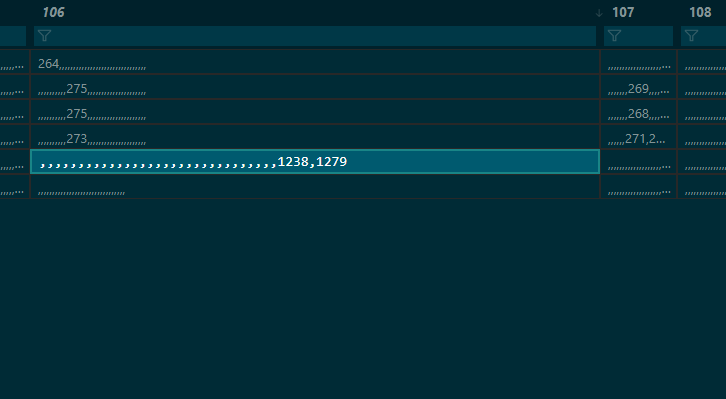

Problem: Say a dark count initiates the timer on cluster. Now say 24 ns later a real signal starts, currently after 25ns the cluster will stop. To avoid this happening, the upper limit of time before an event is not recorded should be updated dynamically. So for this example, at 24ns the time window is again updated 

In [9]:
def reform_data(x,RPC,side):
    out = []
    for ind,n in enumerate(x):
        #n is list of hit times for a specific channel in an event.
        if n:
            for y in n:
                #y is hit time in hittimes n
                out.append([RPC,ind,y,side])
    return out

In [10]:
def coincidence(time,event_sorted,time_window):
    #Find all hits that are coincident.
    hit_locations = []
    t = time

    #Elements in event_srted look like [RPC,CHANNEL,HIT_TIME,side]
    for hit in event_sorted:
        if t<= hit[2] < t+time_window:
            hit_locations.append(hit)
            t= hit[2] 
            #Update time for filter, the cluster will continue if more hits are coincident after this event within the time window.
    
    final_time = t+ time_window

    return hit_locations, final_time

In [11]:
etaHits  = [row[0:2] for row in etaHits]
phiHits = [row[0:2] for row in phiHits] #Just producing some test rows to test.

time_window = 25
#trigger_num = 3
i = 0
coincident_hits = []

for event in range(0,len(etaHits[0])):
    #Scan over all events in the data collection
    i+=1
    print(i)

    channels = []

    for RPC in range(6):
         #Scan through hits of each RPC

        hits_eta = reform_data(etaHits[RPC][event],RPC,'eta') #Extracting relevant element of etaHits
        hits_phi = reform_data(phiHits[RPC][event],RPC,'phi') #Extracting relevant element of phiHits

        channels += hits_eta
        channels += hits_phi

    #Sort all hits in an event by time. 
    event_sorted = sorted(channels, key=lambda x: x[2])

    #event_sorted = [[RPC,CHANNEL,HITTIME],[...],...] , with HITTIME SORTED IN ASCENDING ORDER!

    #initiliase time to time of first event.

    t = event_sorted[0][2]
    while t < 1250:
        for hit in event_sorted:
            if hit[2] == t:
                hit_locations, final_time = coincidence(t,event_sorted,time_window)
                coincident_hits.append([f'Event {i}',t, hit_locations]) # t here is the initial time of the cluster.
                t = final_time# Update time 
                
        t+= 1
    

1
2


The above code appears to work well for the two rows selected. I will turn this into a function and test it on the entire 60s dataset.

In [12]:
def FindCoincidentHits(etaHits,phiHits,time_window):

    #time_window in nanoseconds

    i = 0
    coincident_hits = []

    for event in range(0,len(etaHits[0])):
        #Scan over all events in the data collection
        i+=1
        print(i)

        channels = []

        for RPC in range(6):
            #Scan through hits of each RPC

            hits_eta = reform_data(etaHits[RPC][event],RPC,'eta') #Extracting relevant element of etaHits
            hits_phi = reform_data(phiHits[RPC][event],RPC,'phi') #Extracting relevant element of phiHits

            channels += hits_eta
            channels += hits_phi

        #Sort all hits in an event by time. 
        event_sorted = sorted(channels, key=lambda x: x[2])

        #print(event_sorted)

        #event_sorted = [[RPC,CHANNEL,HITTIME],[...],...] , with HITTIME SORTED IN ASCENDING ORDER!

        #initiliase time to time of first event.

        t = event_sorted[0][2]
        while t < 1250:
            for hit in event_sorted:
                if hit[2] == t:
                    hit_locations, final_time = coincidence(t,event_sorted,time_window)
                    coincident_hits.append([f'Event {i}',t, hit_locations]) # t here is the initial time of the cluster.
                    t = final_time# Update time 
                    
            t+= 1

    return coincident_hits

In [14]:
data = ANT.importDatafile(current_directory+"\\ProAnubisData\\60sRun_24_3_4.h5")
etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data)

coincident_hits_60s = FindCoincidentHits(etaHits,phiHits,15)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Using this new code, I will now analyse the dark count clustering inside each RPC. Dark counts dominate regions for TDC times <200 and >~400. (judging from hit time maps)

In [16]:
dark_coincidence = [x for x in coincident_hits_60s if x[1] < 200 or x[1]>400]

In [23]:
def dark_clustering(anomalous_cutoff =10):
    pass

phi_cluster_distribution = [[] for _ in range(6)] # [[RPC1],[RPC2],[RPC3],...]
eta_cluster_distribution = [[] for _ in range(6)]
anomalous_clusters = [[] for _ in range(6)] #Store anomalous hits for each RPC

all_rpc_phi_clusters = []
all_rpc_eta_clusters = []

# k = 0

for coincidence_event in dark_coincidence:

    # coincidence : ['Event x', TIMEBIN, [hit_locations]]
    hit_locations = coincidence_event[2]
    #hit_locations = [[RPC,CHANNEL,HIT_TIME,eta/phi]...]

    #Extract hit_locations in phi and eta directions.
    phi_locations = [x for x in hit_locations if x[3]=='phi']
    eta_locations = [x for x in hit_locations if x[3]=='eta']

    #Sort by channels
    phi_locations = sorted(phi_locations, key=lambda x: x[1])
    eta_locations = sorted(eta_locations, key=lambda x: x[1])


    for RPC in range(6):
        #Work out the cluster distribution for each RPC during this specific dark count event.

        rpc_phi_clusters = []
        rpc_eta_clusters = [] 

        i = 0
        for index,hit in enumerate([x for x in phi_locations if x[0]==RPC]):
            if index==0:
                previous_element = hit[1]
                rpc_phi_clusters.append([hit])
            else:
                if abs(hit[1] - previous_element) > 1:
                    # Hit is not part of the same cluster, intiate a new cluster
                    rpc_phi_clusters.append([hit])
                    i += 1
                else:
                    # Hit is part of the same cluster
                    rpc_phi_clusters[i].append(hit)
                previous_element = hit[1]

        j = 0
        for index,hit in enumerate([x for x in eta_locations if x[0]==RPC]):
        
            if index == 0:
                previous_element = hit[1]
                rpc_eta_clusters.append([hit])
            else:
                if abs(hit[1] - previous_element) > 1:
                    # Hit is not part of the same cluster
                    rpc_eta_clusters.append([hit])
                    j += 1
                else:
                    # Hit is part of the same cluster
                    rpc_eta_clusters[j].append(hit)
                previous_element = hit[1]

        if rpc_phi_clusters:
             all_rpc_phi_clusters.append(rpc_phi_clusters)
        if rpc_eta_clusters:
            all_rpc_eta_clusters.append(rpc_eta_clusters)

        for x in rpc_phi_clusters:
            if len(x) > 10:
                #ANOMALOUS EVENT, NOISE BURST?
                anomalous_clusters[RPC].append(x)
            else:
                phi_cluster_distribution[RPC].append(len(x))
            
        for y in rpc_eta_clusters:
            if len(y) > 10:
                anomalous_clusters[RPC].append(y)
            else:
                eta_cluster_distribution[RPC].append(len(y))


print(all_rpc_eta_clusters)
print(all_rpc_phi_clusters)


[[[[4, 31, 113, 'eta']]], [[[5, 31, 114, 'eta']]], [[[2, 8, 1240, 'eta'], [2, 9, 1242, 'eta']], [[2, 11, 1240, 'eta'], [2, 12, 1240, 'eta']], [[2, 15, 1232, 'eta']]], [[[4, 31, 32, 'eta']]], [[[5, 31, 31, 'eta']]], [[[4, 31, 870, 'eta']]], [[[4, 31, 912, 'eta']]], [[[5, 31, 20, 'eta']]], [[[4, 31, 170, 'eta']]], [[[5, 31, 169, 'eta']]], [[[2, 28, 45, 'eta']]], [[[1, 14, 479, 'eta']]], [[[4, 31, 633, 'eta']]], [[[5, 31, 634, 'eta']]], [[[4, 13, 32, 'eta']]], [[[4, 31, 678, 'eta']]], [[[5, 31, 679, 'eta']]], [[[4, 31, 649, 'eta']]], [[[4, 31, 60, 'eta']]], [[[5, 31, 60, 'eta']]], [[[4, 31, 101, 'eta']]], [[[5, 31, 100, 'eta']]], [[[4, 31, 1026, 'eta']]], [[[5, 31, 1028, 'eta']]], [[[5, 31, 891, 'eta']]], [[[4, 13, 189, 'eta']]], [[[1, 21, 1026, 'eta']]], [[[1, 21, 1091, 'eta']]], [[[4, 31, 519, 'eta']]], [[[2, 15, 948, 'eta']]], [[[2, 15, 1093, 'eta']]], [[[2, 15, 1203, 'eta']]], [[[4, 31, 874, 'eta']]], [[[5, 31, 874, 'eta']]], [[[4, 31, 1238, 'eta']]], [[[4, 13, 1008, 'eta']]], [[[4, 3

In [25]:
print([x for x in all_rpc_eta_clusters if len(x)>1])

[[[[2, 8, 1240, 'eta'], [2, 9, 1242, 'eta']], [[2, 11, 1240, 'eta'], [2, 12, 1240, 'eta']], [[2, 15, 1232, 'eta']]], [[[4, 14, 220, 'eta']], [[4, 16, 217, 'eta']]], [[[4, 21, 167, 'eta']], [[4, 30, 170, 'eta'], [4, 30, 194, 'eta'], [4, 31, 168, 'eta'], [4, 31, 191, 'eta']]], [[[5, 21, 168, 'eta']], [[5, 30, 170, 'eta']]], [[[5, 7, 755, 'eta'], [5, 8, 754, 'eta']], [[5, 12, 746, 'eta'], [5, 13, 745, 'eta'], [5, 14, 748, 'eta'], [5, 15, 755, 'eta'], [5, 16, 754, 'eta'], [5, 17, 755, 'eta']]], [[[5, 16, 827, 'eta'], [5, 17, 826, 'eta']], [[5, 19, 826, 'eta'], [5, 20, 830, 'eta']]]]


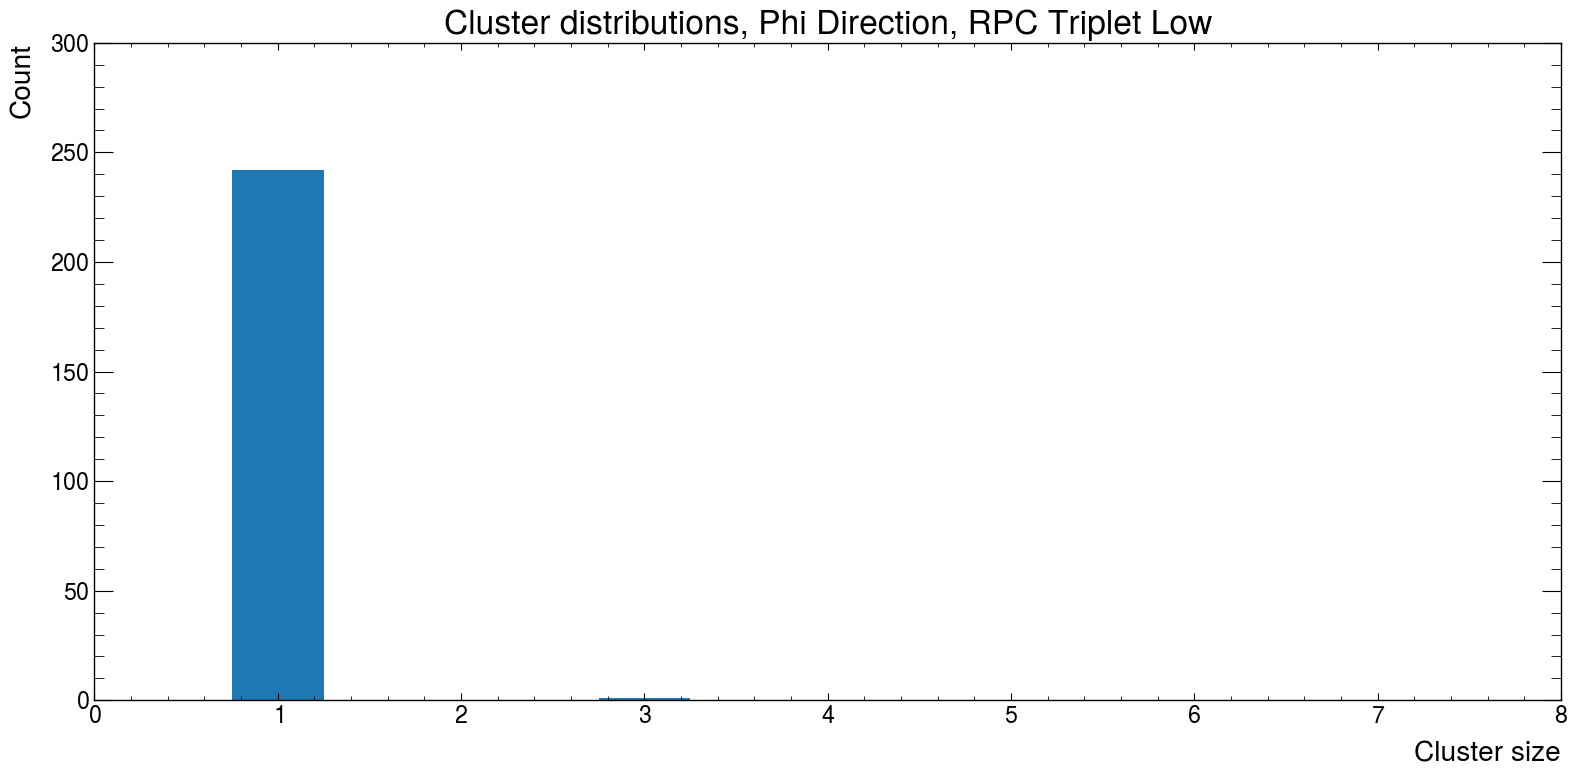

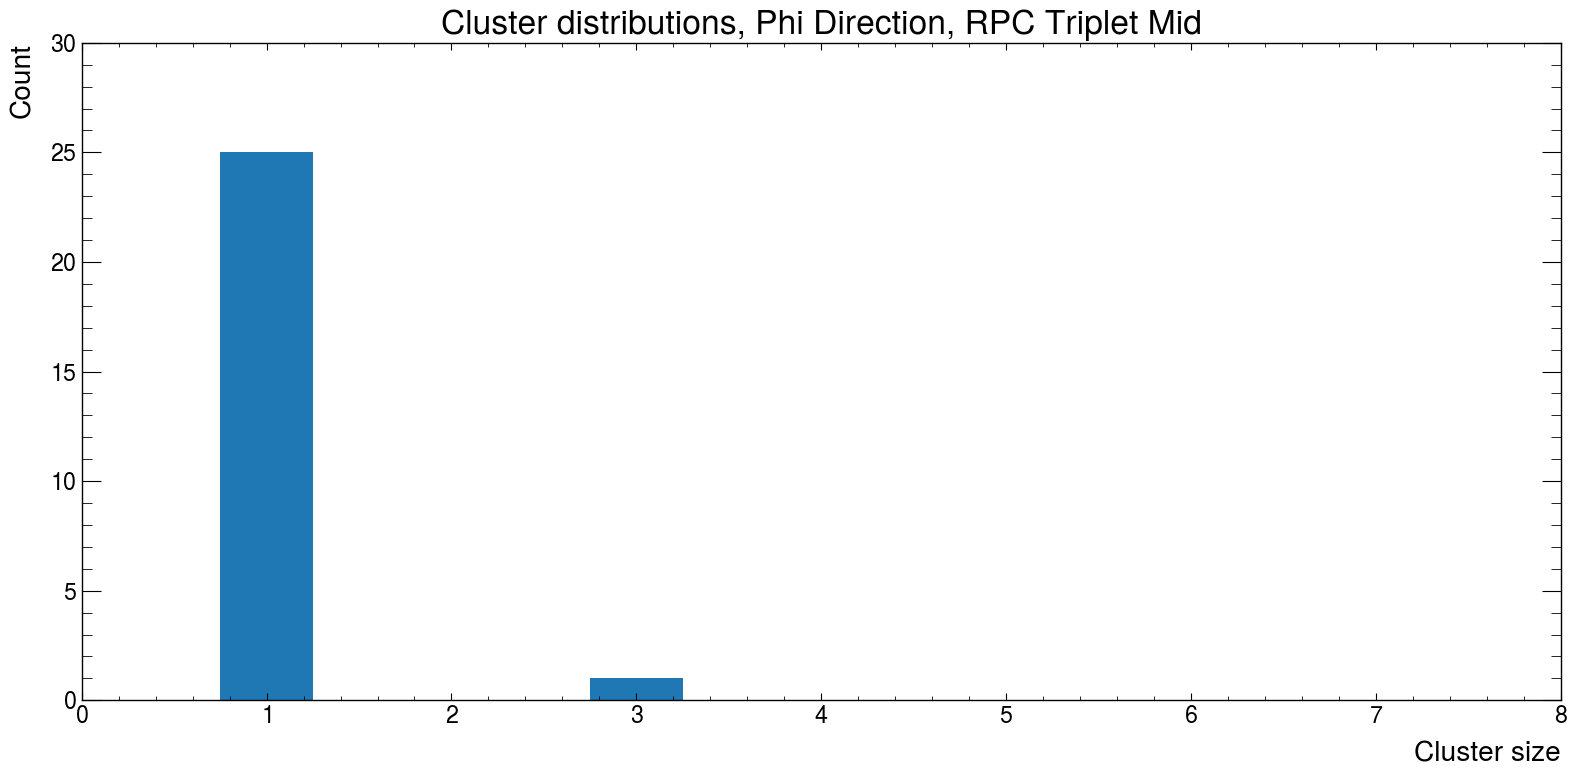

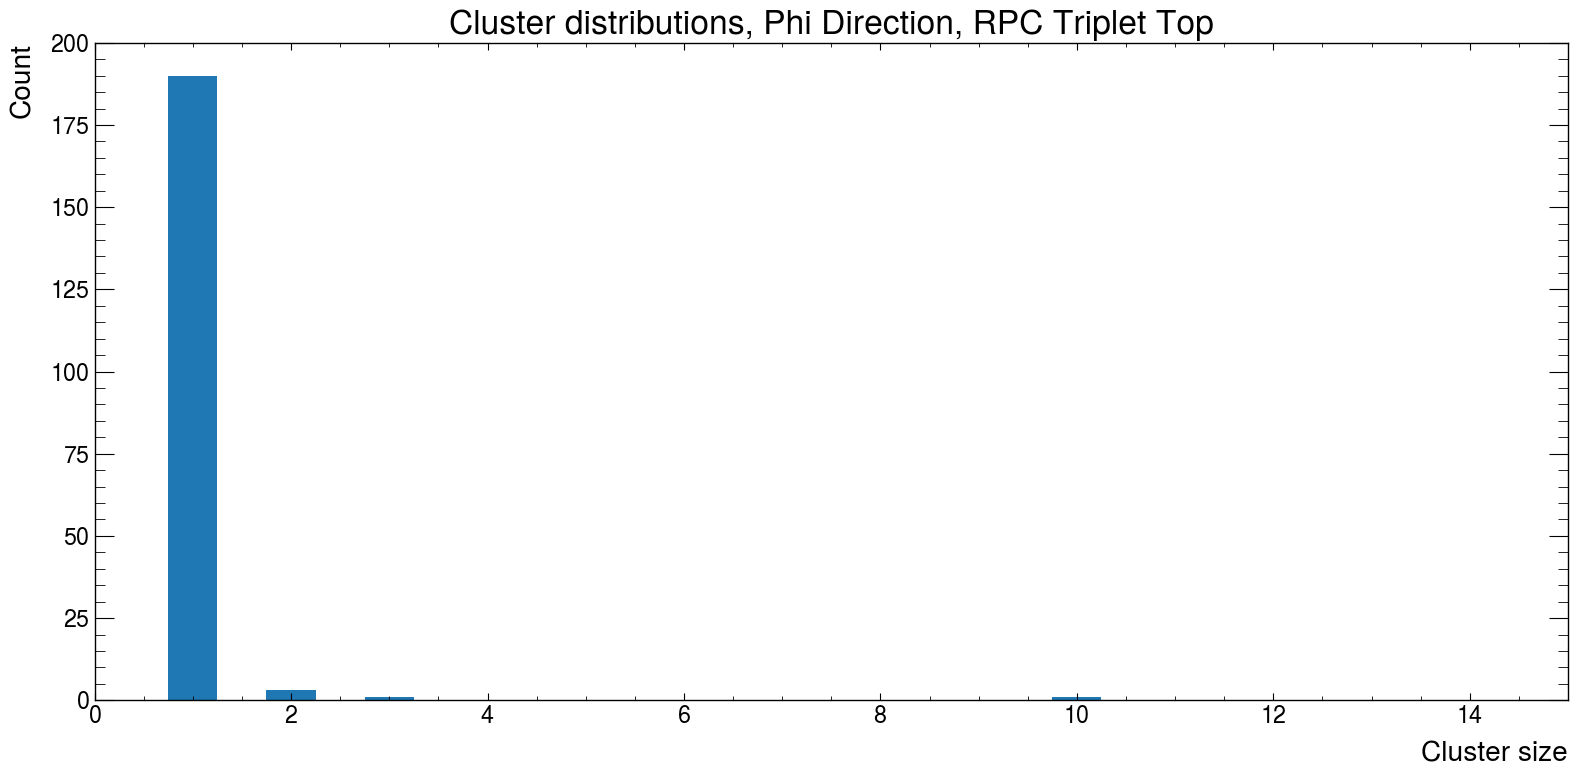

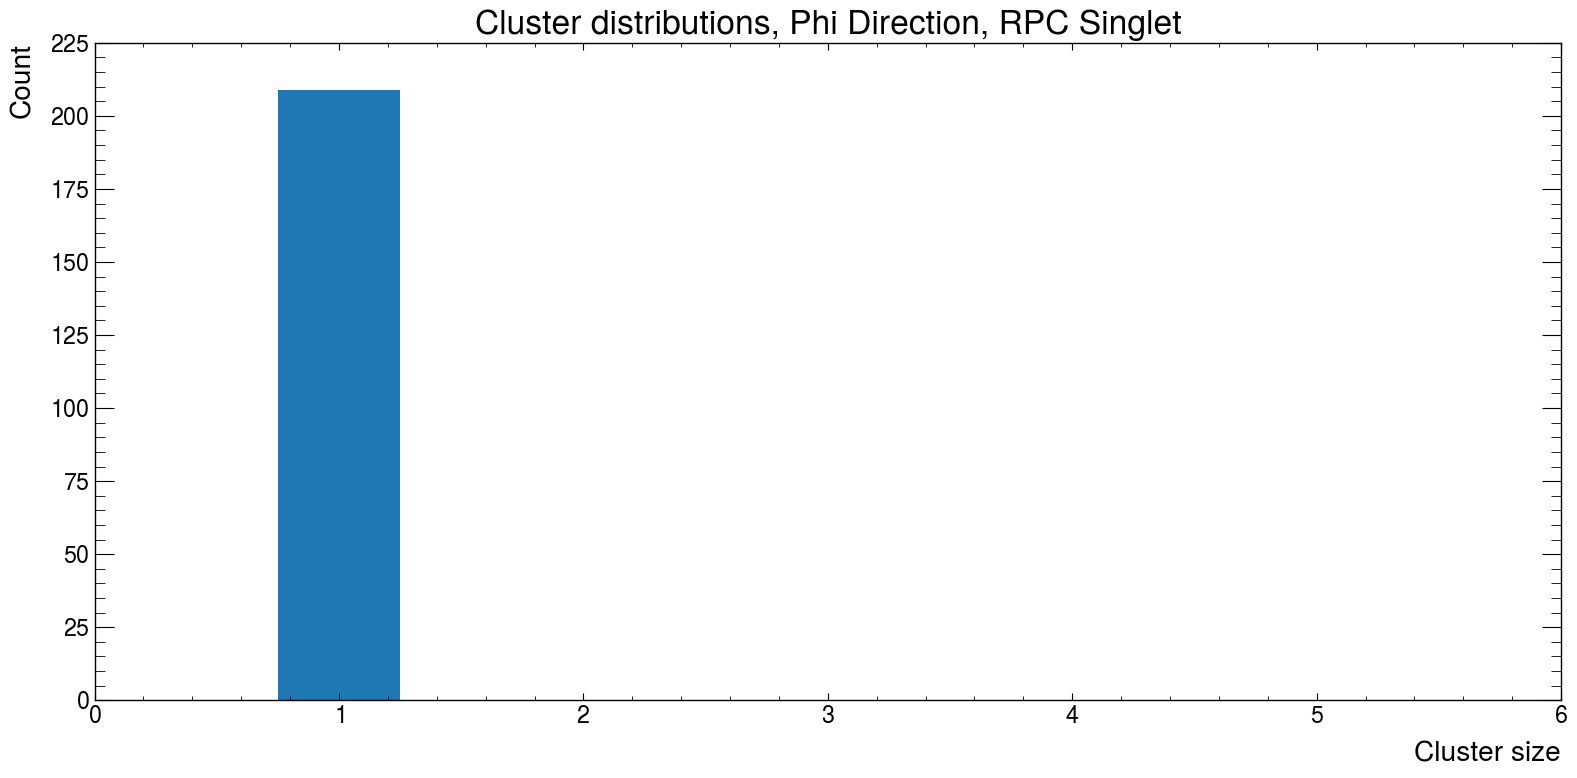

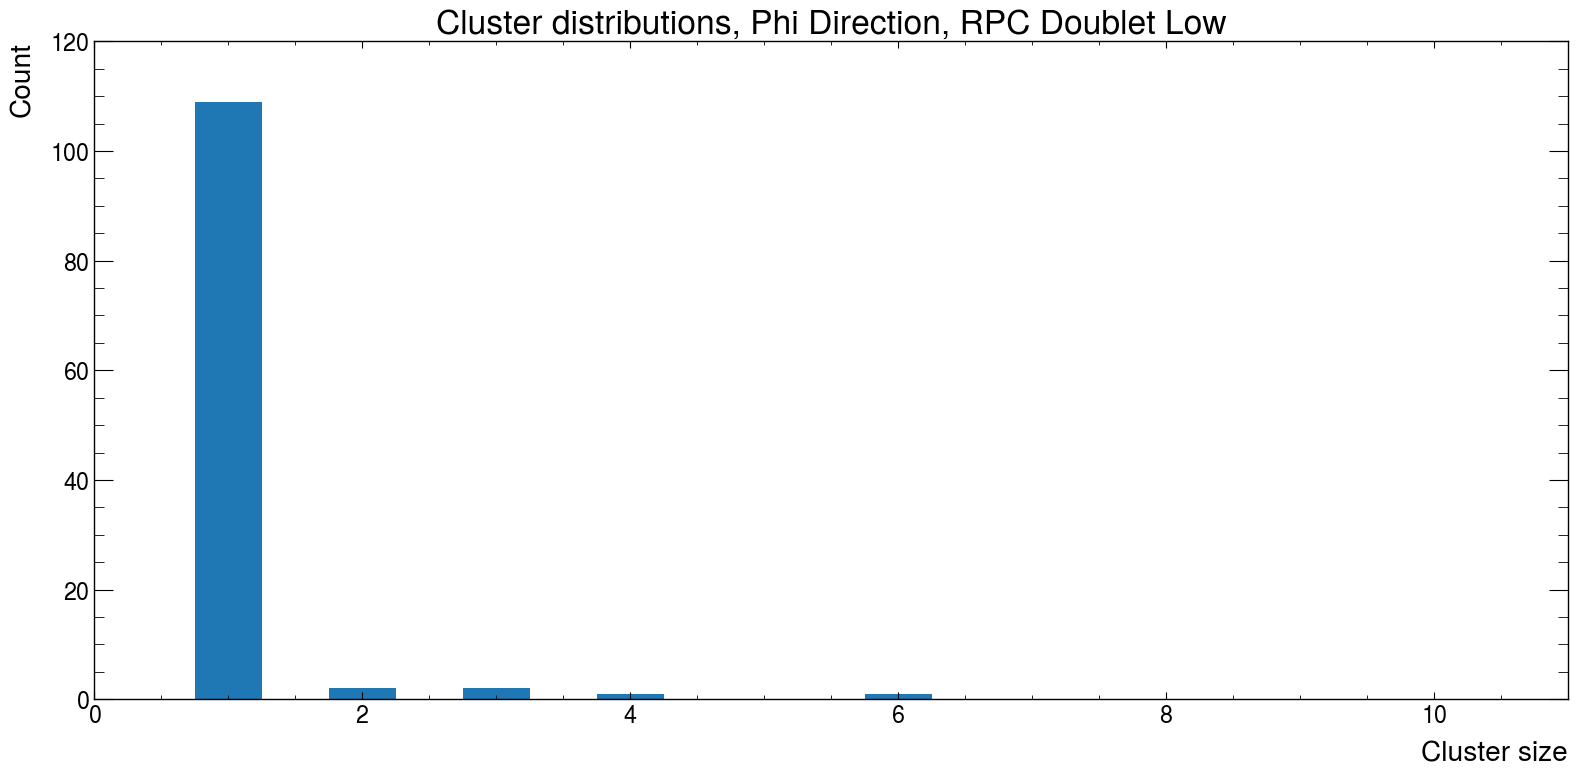

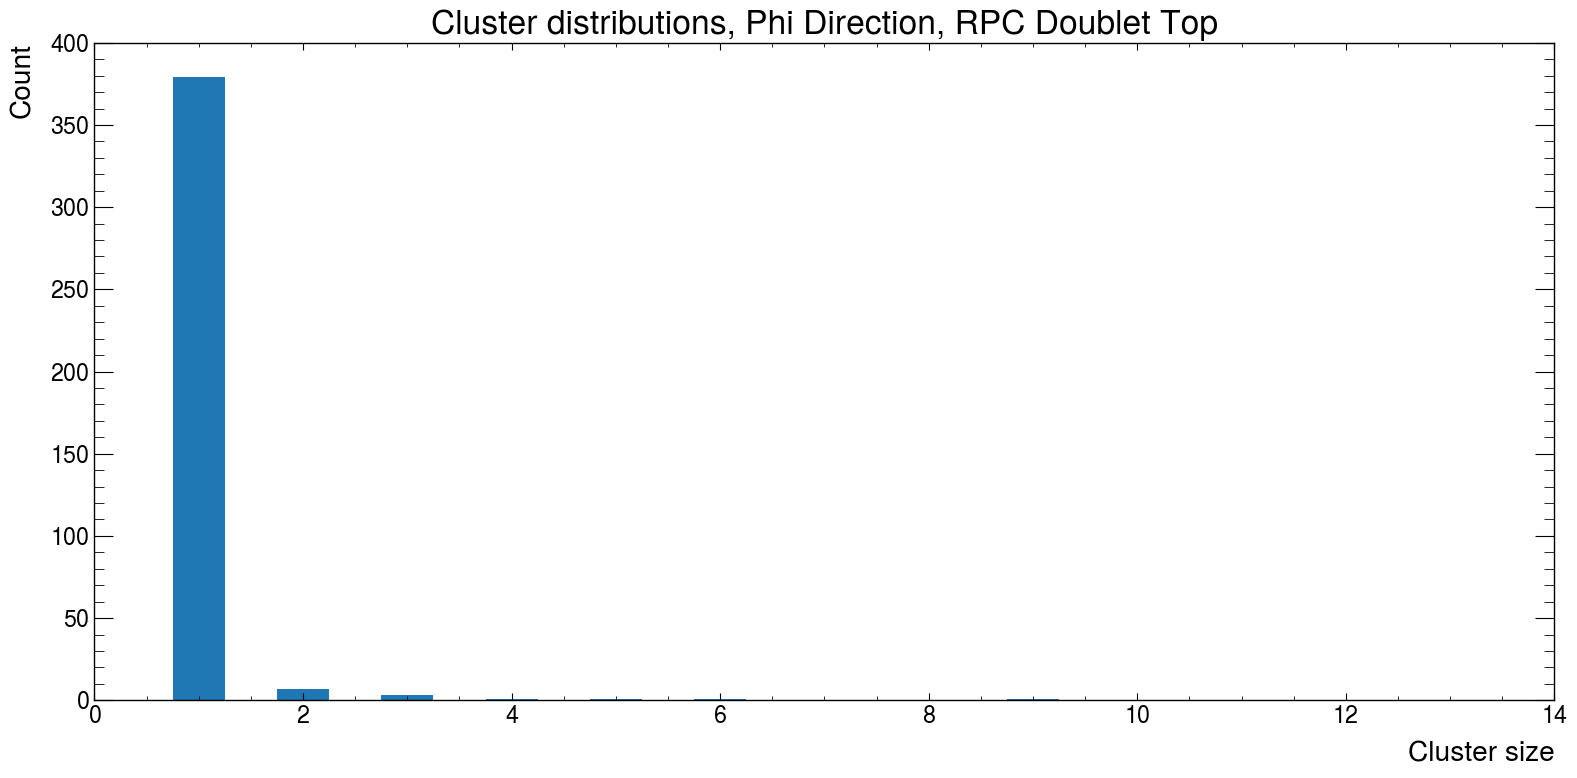

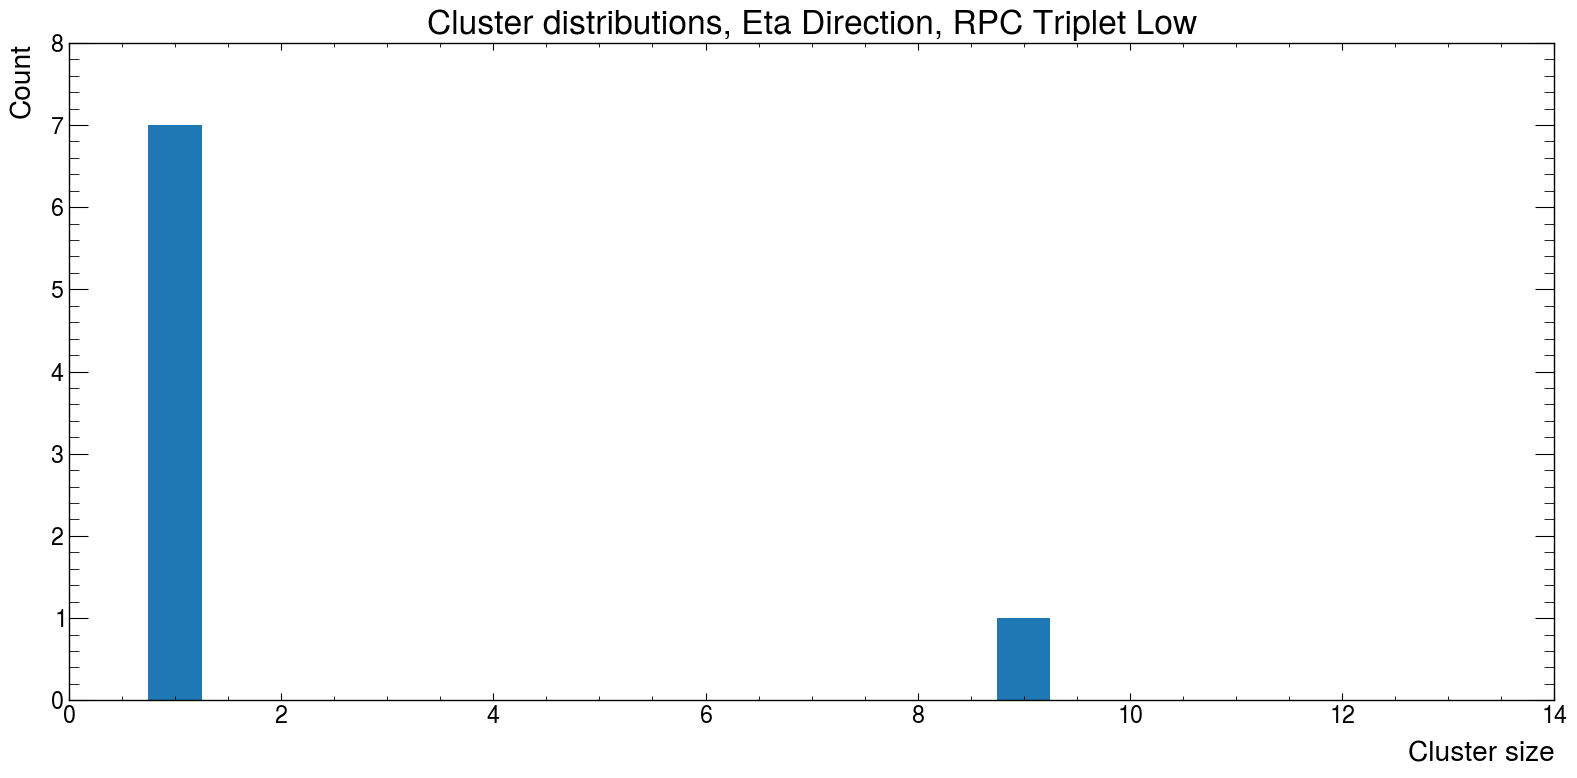

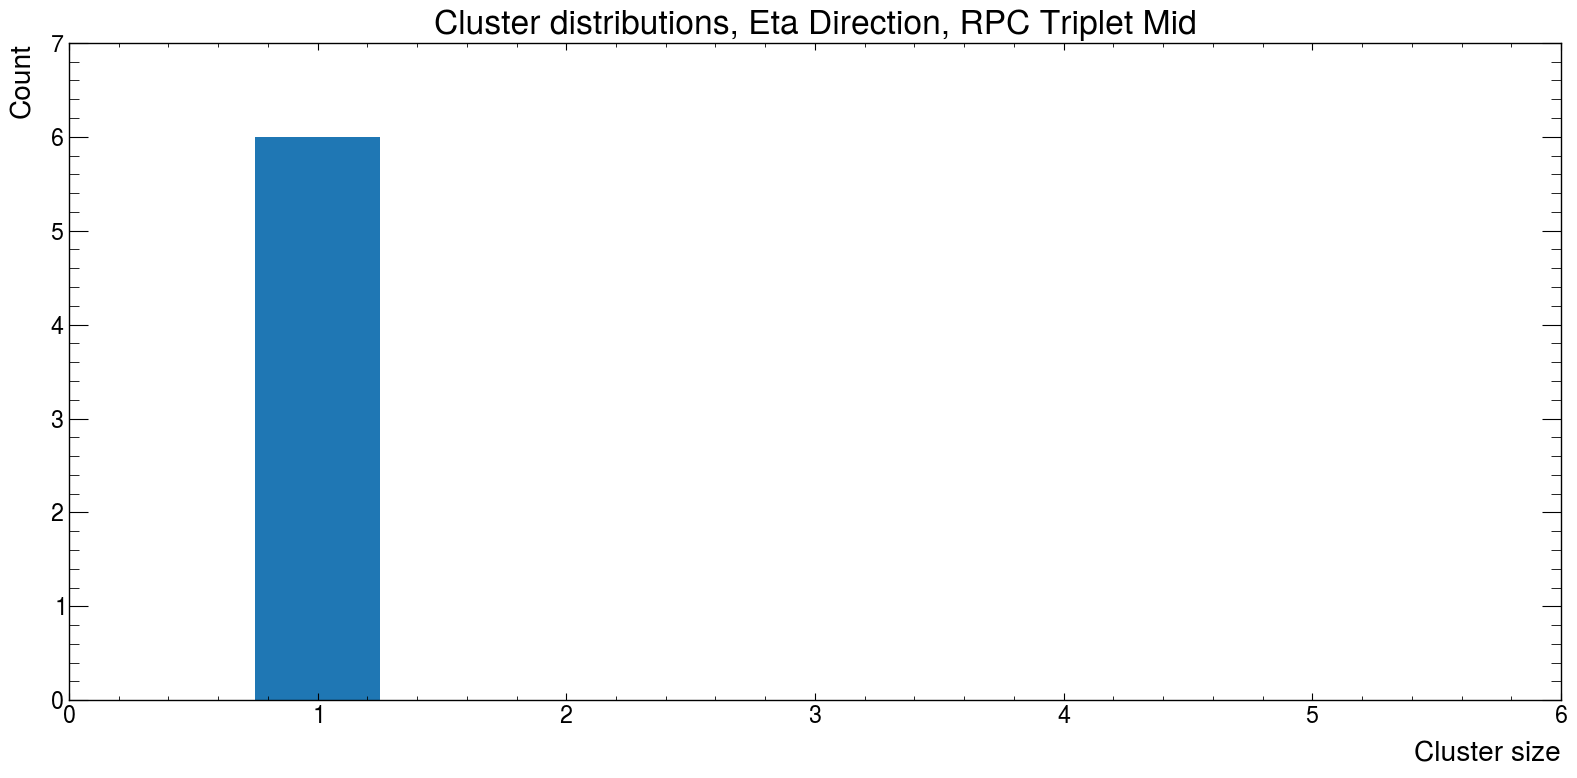

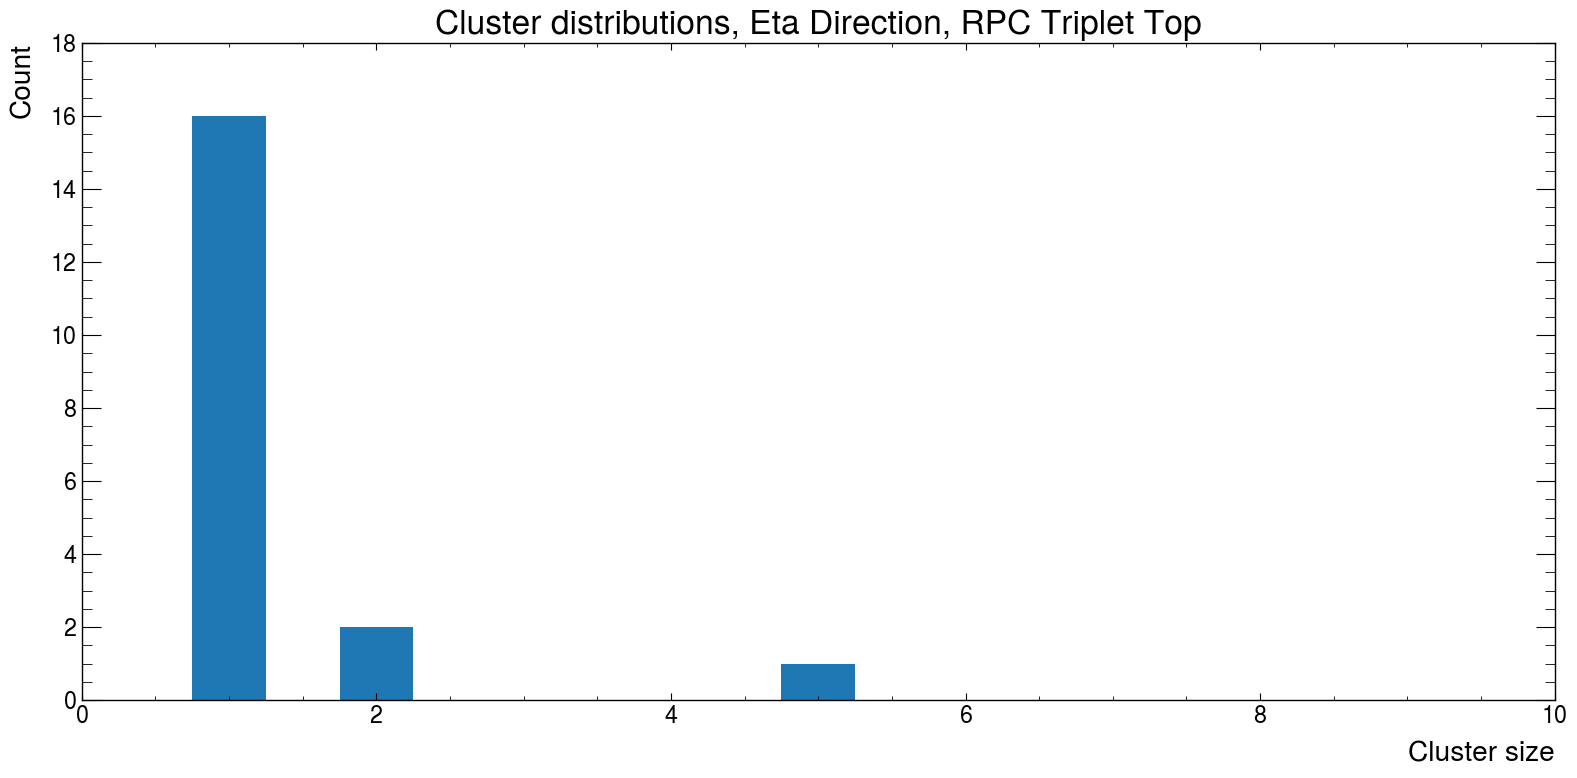

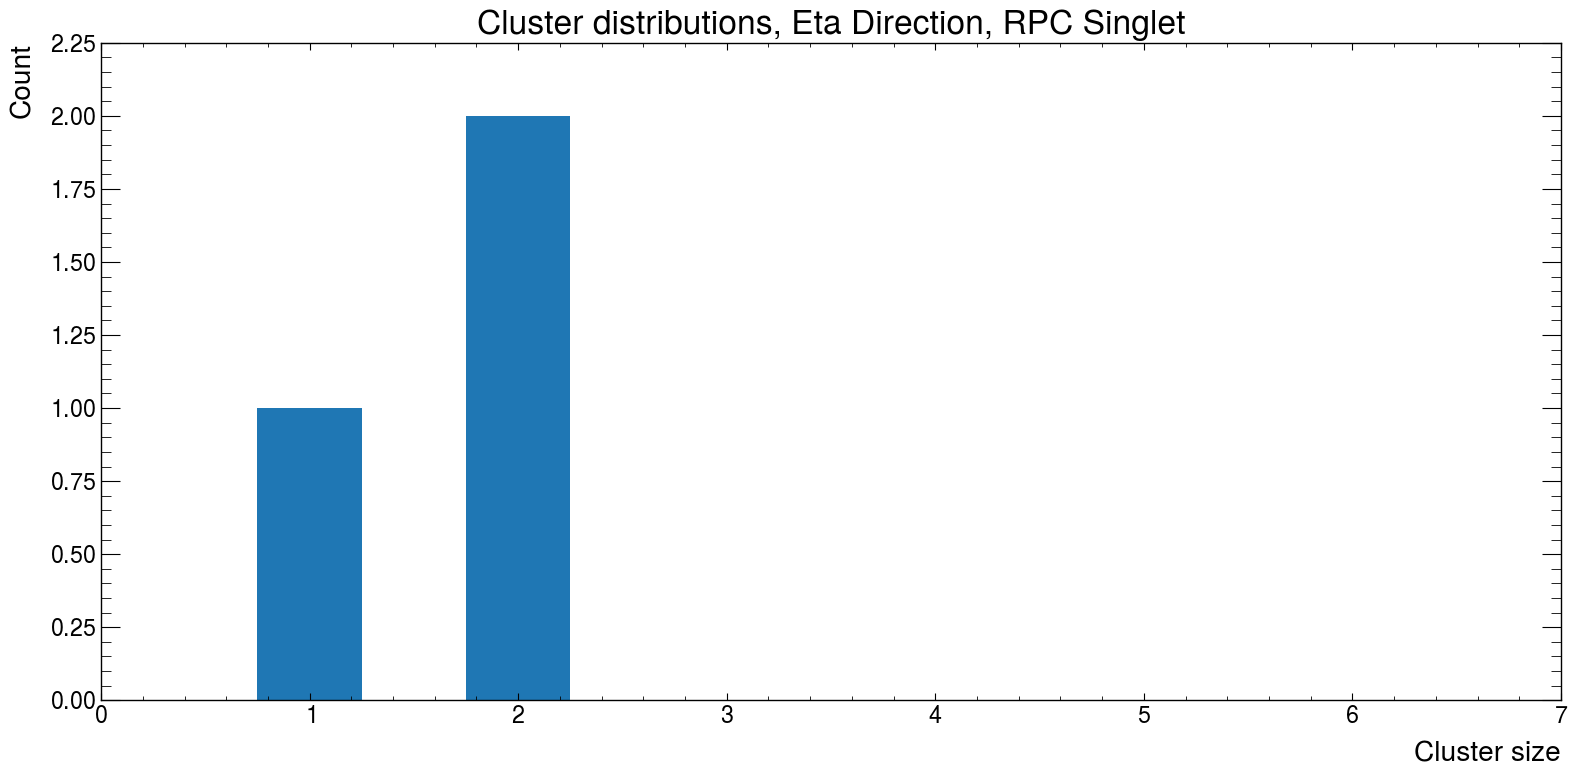

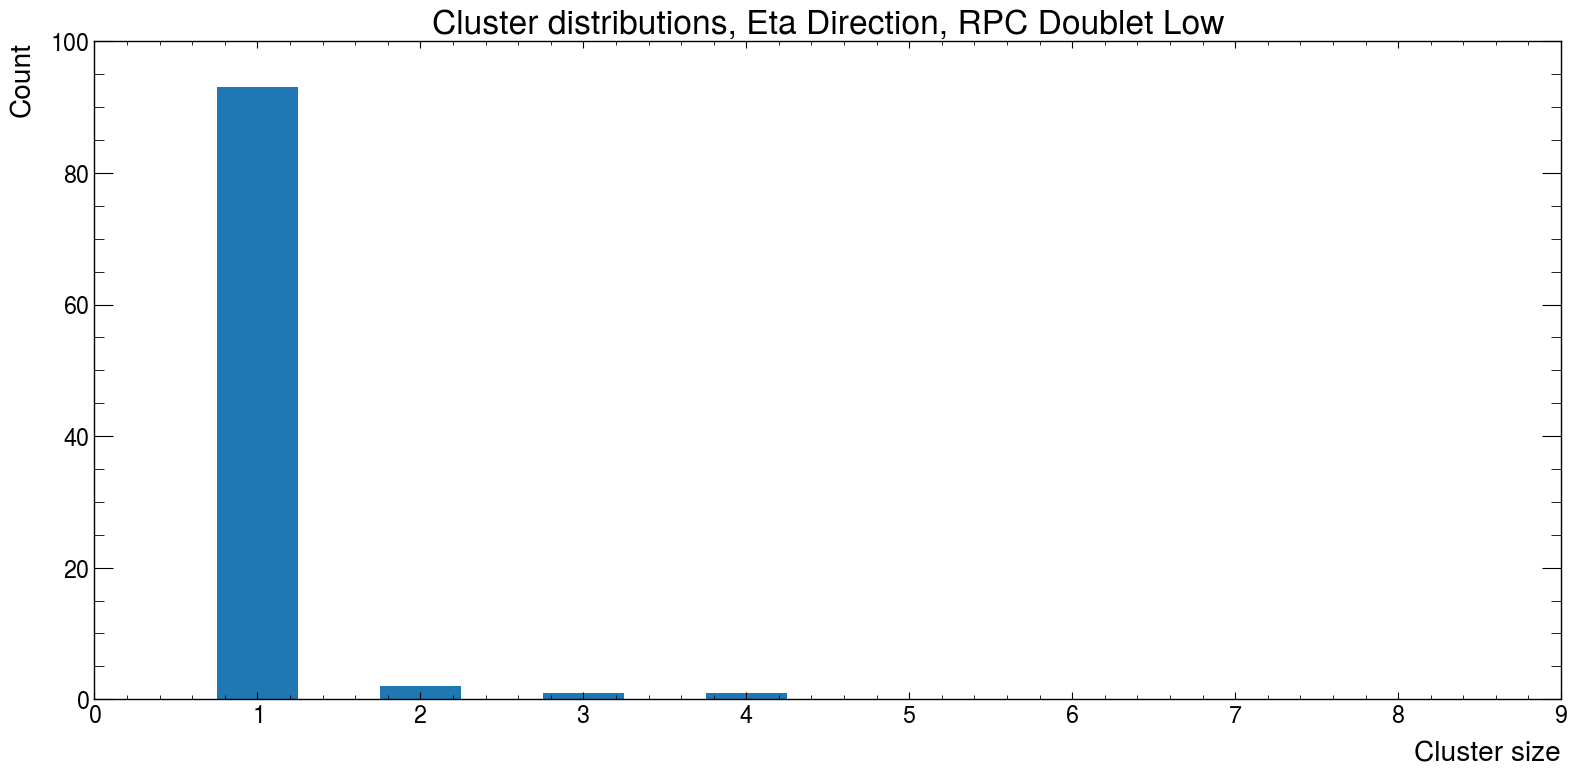

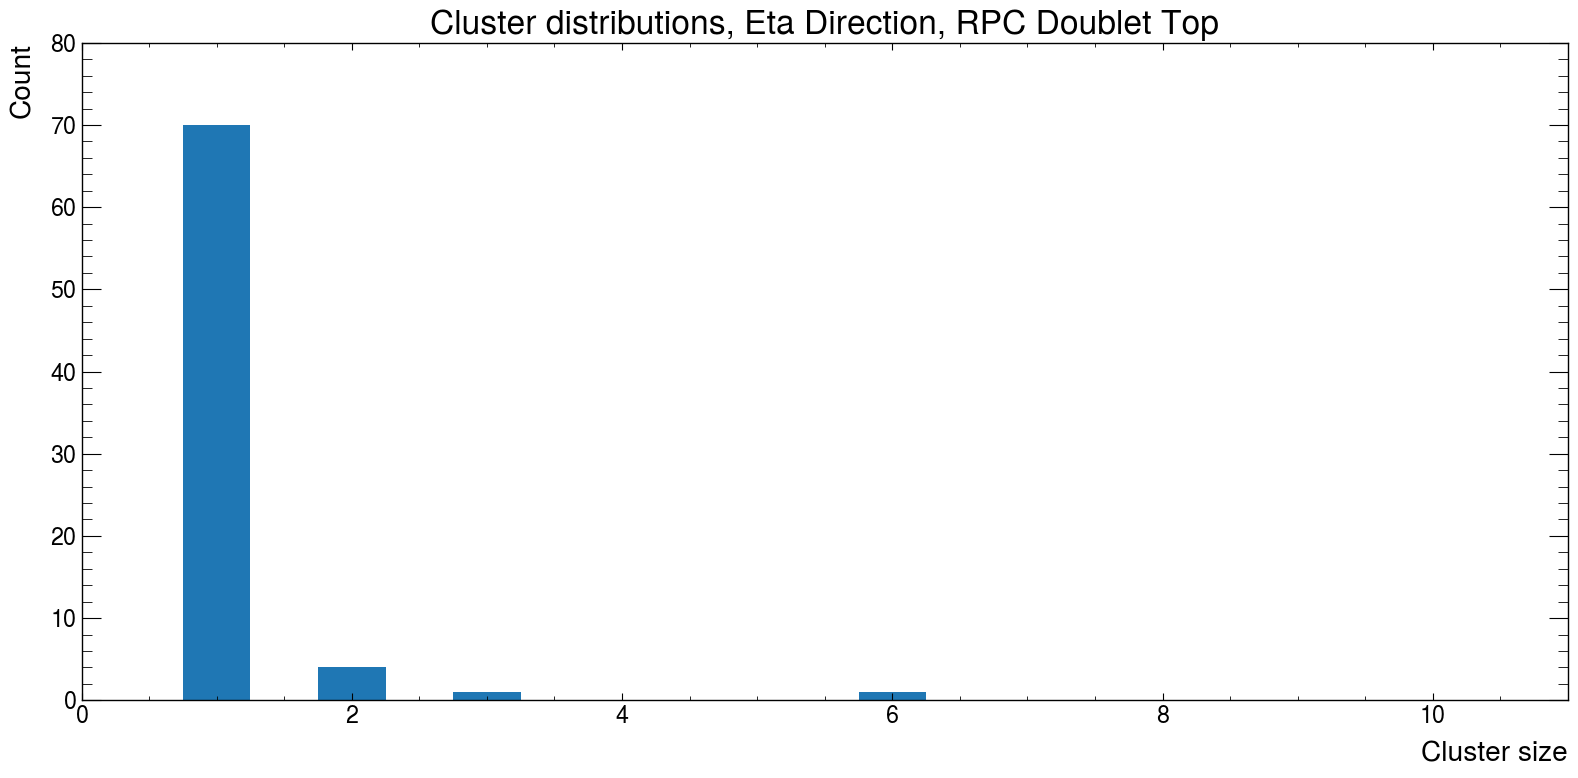

In [26]:
RPC_description = ['Triplet Low','Triplet Mid','Triplet Top','Singlet','Doublet Low','Doublet Top']
multi_array = []
current_directory=  os.path.dirname(os.getcwd())

for RPC in range(len(RPC_description)):
    if phi_cluster_distribution[RPC]:

        fig, ax = plt.subplots(1, figsize=(16, 8), dpi=100)
        bin_edges = [i - 0.5 for i in range(min(phi_cluster_distribution[RPC]), max(phi_cluster_distribution[RPC]) + 2)]
        plt.hist(phi_cluster_distribution[RPC], bins=bin_edges, align='mid', rwidth=0.5)
        plt.xlabel('Cluster size')
        plt.ylabel('Count')
        plt.xlim(0, max(phi_cluster_distribution[RPC]) + 5)
        plt.title(f'Cluster distributions, Phi Direction, RPC {RPC_description[RPC]}')
        plt.tight_layout()  # Adjust layout
        plt.savefig(current_directory+f"\\Figures\\Phi{RPC}.png")
        multi_array.append(current_directory+f"\\Figures\\Phi{RPC}.png")

for RPC in range(len(RPC_description)):
    if eta_cluster_distribution[RPC]:

        fig, ax = plt.subplots(1, figsize=(16, 8), dpi=100)
        bin_edges = [i - 0.5 for i in range(min(eta_cluster_distribution[RPC]), max(eta_cluster_distribution[RPC]) + 2)]
        plt.hist(eta_cluster_distribution[RPC], bins=bin_edges, align='mid', rwidth=0.5)
        plt.xlabel('Cluster size')
        plt.ylabel('Count')
        plt.xlim(0, max(eta_cluster_distribution[RPC]) + 5)
        plt.title(f'Cluster distributions, Eta Direction, RPC {RPC_description[RPC]}')
        plt.tight_layout()  # Adjust layout
        plt.savefig(current_directory+f"\\Figures\\Eta{RPC}.png")
        multi_array.append(current_directory+f"\\Figures\\Eta{RPC}.png")

anPlot.combinePlots(multi_array,"Dark Clustering, 60 seconds")
for plot in multi_array:
    os.remove(plot)


Now I will turn the above code into functions and add them to the triggerfunctions.py file

In [27]:
def dark_clustering(dark_coincidence, anomalous_cutoff =10):

    phi_cluster_distribution = [[] for _ in range(6)] # [[RPC1],[RPC2],[RPC3],...]
    eta_cluster_distribution = [[] for _ in range(6)]
    anomalous_clusters = [[] for _ in range(6)] #Store anomalous hits for each RPC

    all_rpc_phi_clusters = []
    all_rpc_eta_clusters = []

    for coincidence_event in dark_coincidence:

        # coincidence : ['Event x', TIMEBIN, [hit_locations]]
        hit_locations = coincidence_event[2]
        #hit_locations = [[RPC,CHANNEL,HIT_TIME,eta/phi]...]

        #Extract hit_locations in phi and eta directions.
        phi_locations = [x for x in hit_locations if x[3]=='phi']
        eta_locations = [x for x in hit_locations if x[3]=='eta']

        #Sort by channels
        phi_locations = sorted(phi_locations, key=lambda x: x[1])
        eta_locations = sorted(eta_locations, key=lambda x: x[1])


        for RPC in range(6):
            #Work out the cluster distribution for each RPC during this specific dark count event.

            rpc_phi_clusters = []
            rpc_eta_clusters = [] 

            i = 0
            for index,hit in enumerate([x for x in phi_locations if x[0]==RPC]):
                if index==0:
                    previous_element = hit[1]
                    rpc_phi_clusters.append([hit])
                else:
                    if abs(hit[1] - previous_element) > 1:
                        # Hit is not part of the same cluster, intiate a new cluster
                        rpc_phi_clusters.append([hit])
                        i += 1
                    else:
                        # Hit is part of the same cluster
                        rpc_phi_clusters[i].append(hit)
                    previous_element = hit[1]

            j = 0
            for index,hit in enumerate([x for x in eta_locations if x[0]==RPC]):
            
                if index == 0:
                    previous_element = hit[1]
                    rpc_eta_clusters.append([hit])
                else:
                    if abs(hit[1] - previous_element) > 1:
                        # Hit is not part of the same cluster
                        rpc_eta_clusters.append([hit])
                        j += 1
                    else:
                        # Hit is part of the same cluster
                        rpc_eta_clusters[j].append(hit)
                    previous_element = hit[1]

            if rpc_phi_clusters:
                all_rpc_phi_clusters.append(rpc_phi_clusters)
            if rpc_eta_clusters:
                all_rpc_eta_clusters.append(rpc_eta_clusters)

            for x in rpc_phi_clusters:
                if len(x) > anomalous_cutoff:
                    #ANOMALOUS EVENT, NOISE BURST? 
                    anomalous_clusters[RPC].append(x)
                else:
                    phi_cluster_distribution[RPC].append(len(x))
                
            for y in rpc_eta_clusters:
                if len(y) > anomalous_cutoff:
                    anomalous_clusters[RPC].append(y)
                else:
                    eta_cluster_distribution[RPC].append(len(y))

    return all_rpc_eta_clusters,all_rpc_phi_clusters,phi_cluster_distribution,eta_cluster_distribution,anomalous_clusters


In [30]:
def plot_dark_clustering(phi_cluster_distribution,eta_cluster_distribution, time ="60 Seconds"):
    
    RPC_description = ['Triplet Low','Triplet Mid','Triplet Top','Singlet','Doublet Low','Doublet Top']
    multi_array = []
    current_directory=  os.path.dirname(os.getcwd())

    for RPC in range(len(RPC_description)):
        if phi_cluster_distribution[RPC]:

            fig, ax = plt.subplots(1, figsize=(16, 8), dpi=100)
            bin_edges = [i - 0.5 for i in range(min(phi_cluster_distribution[RPC]), max(phi_cluster_distribution[RPC]) + 2)]
            plt.hist(phi_cluster_distribution[RPC], bins=bin_edges, align='mid', rwidth=0.5)
            plt.xlabel('Cluster size')
            plt.ylabel('Count')
            plt.xlim(0, max(phi_cluster_distribution[RPC]) + 5)
            plt.title(f'Cluster distributions, Phi Direction, RPC {RPC_description[RPC]}')
            plt.tight_layout()  # Adjust layout
            plt.savefig(current_directory+f"\\Figures\\Phi{RPC}.png")
            multi_array.append(current_directory+f"\\Figures\\Phi{RPC}.png")

    for RPC in range(len(RPC_description)):
        if eta_cluster_distribution[RPC]:

            fig, ax = plt.subplots(1, figsize=(16, 8), dpi=100)
            bin_edges = [i - 0.5 for i in range(min(eta_cluster_distribution[RPC]), max(eta_cluster_distribution[RPC]) + 2)]
            plt.hist(eta_cluster_distribution[RPC], bins=bin_edges, align='mid', rwidth=0.5)
            plt.xlabel('Cluster size')
            plt.ylabel('Count')
            plt.xlim(0, max(eta_cluster_distribution[RPC]) + 5)
            plt.title(f'Cluster distributions, Eta Direction, RPC {RPC_description[RPC]}')
            plt.tight_layout()  # Adjust layout
            plt.savefig(current_directory+f"\\Figures\\Eta{RPC}.png")
            multi_array.append(current_directory+f"\\Figures\\Eta{RPC}.png")

    anPlot.combinePlots(multi_array,f"Dark Clustering, {time}")
    for plot in multi_array:
        os.remove(plot)


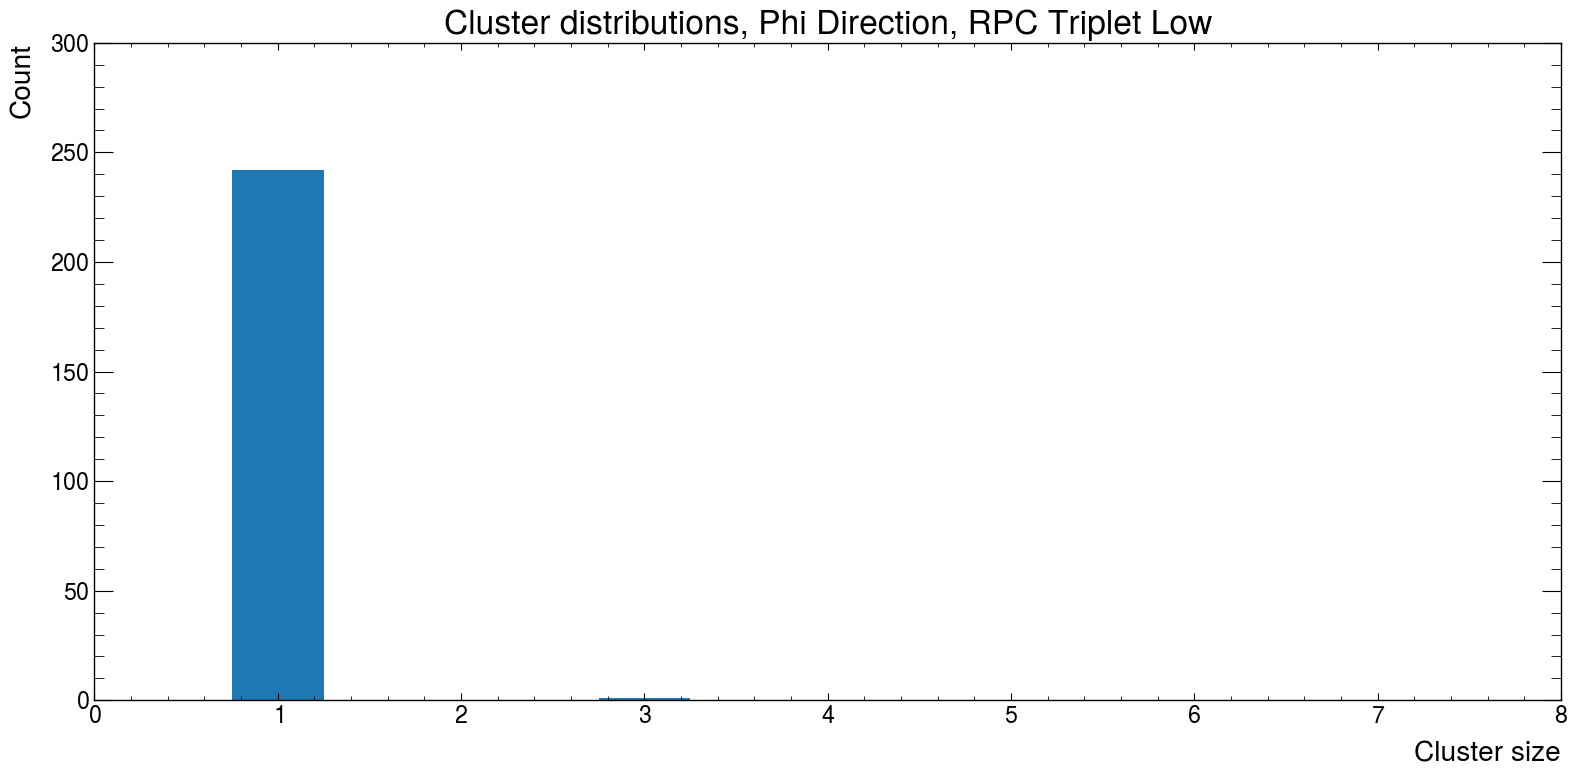

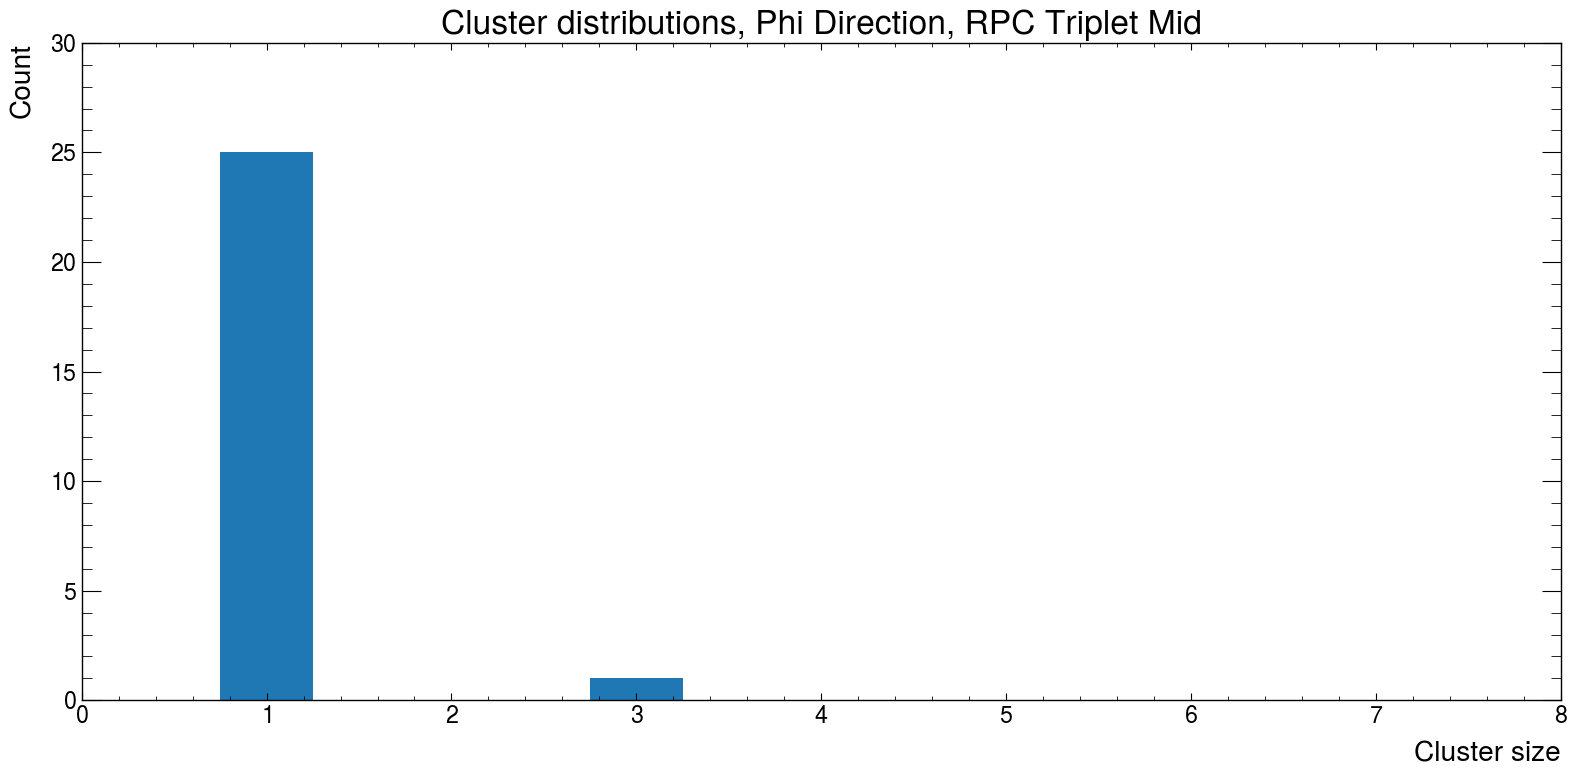

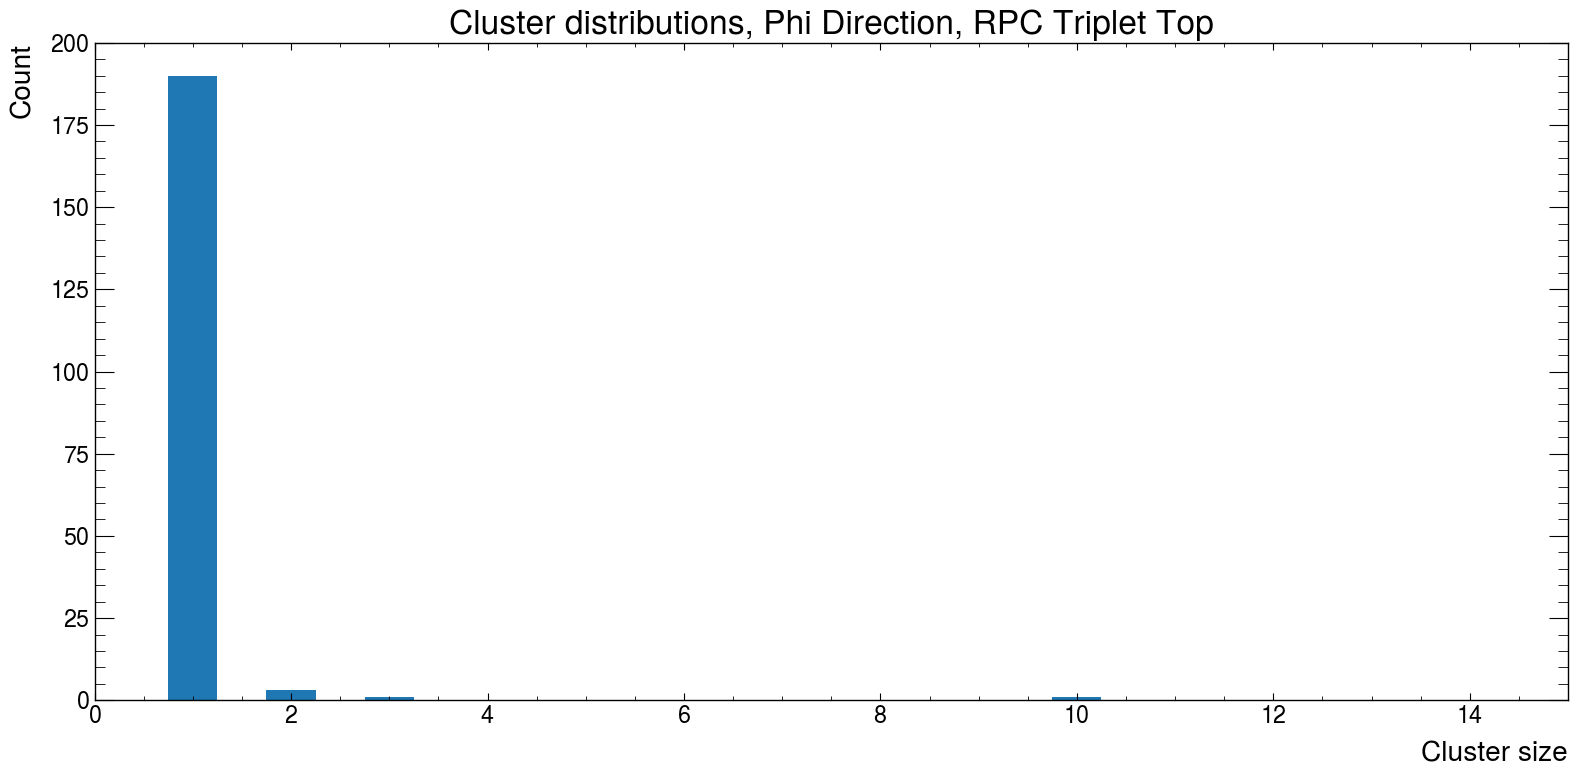

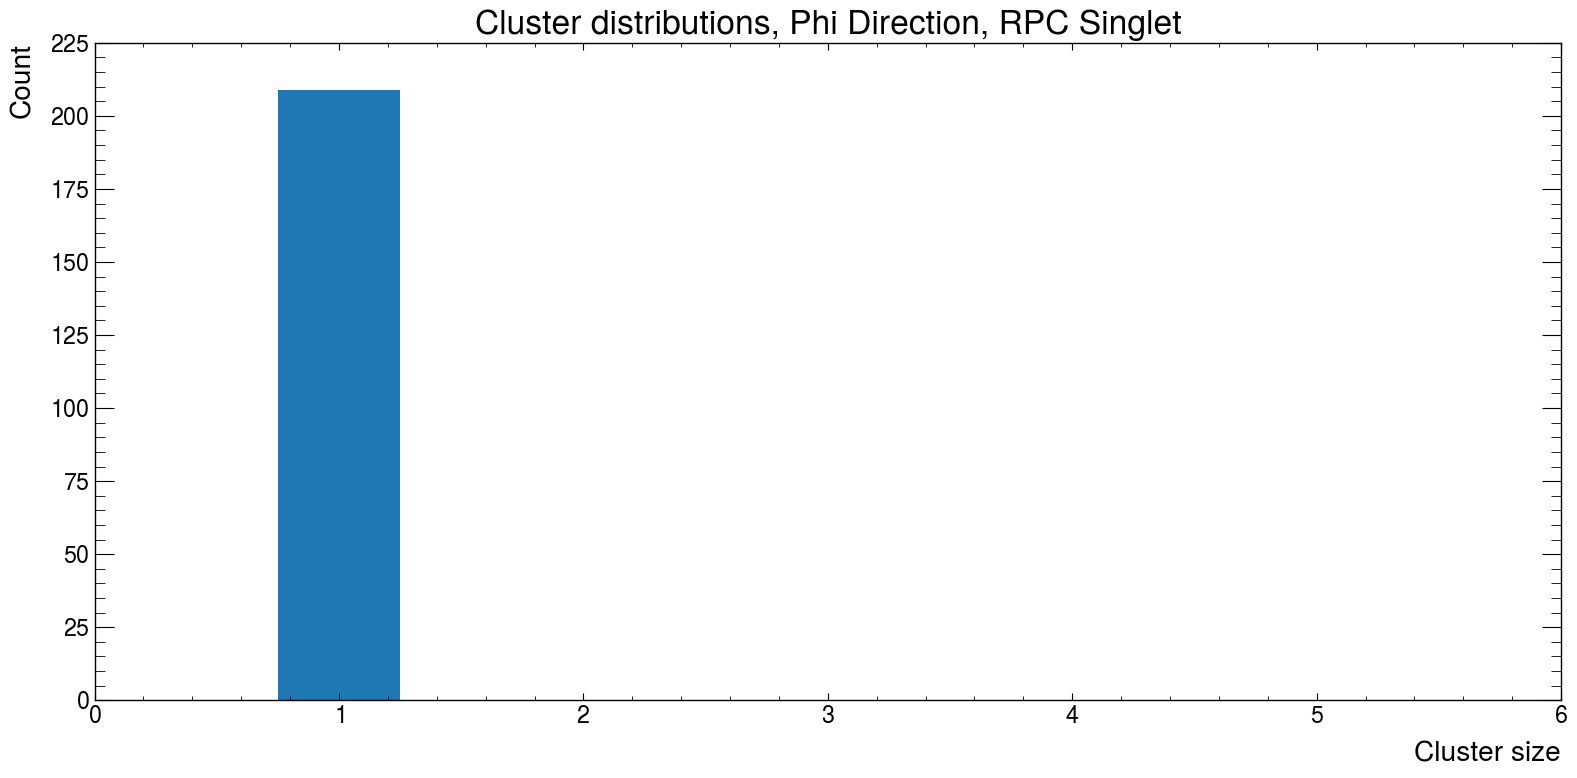

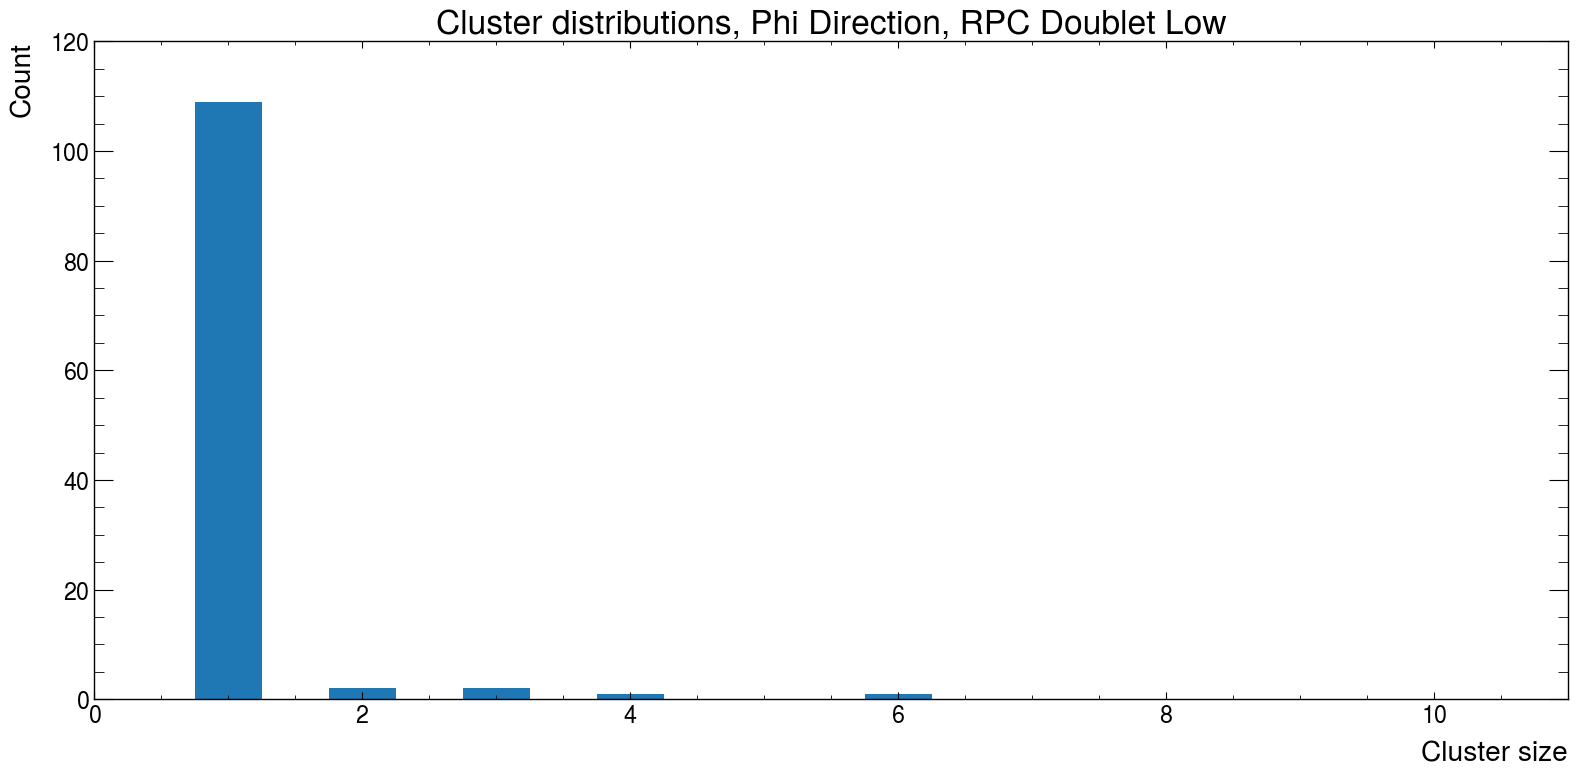

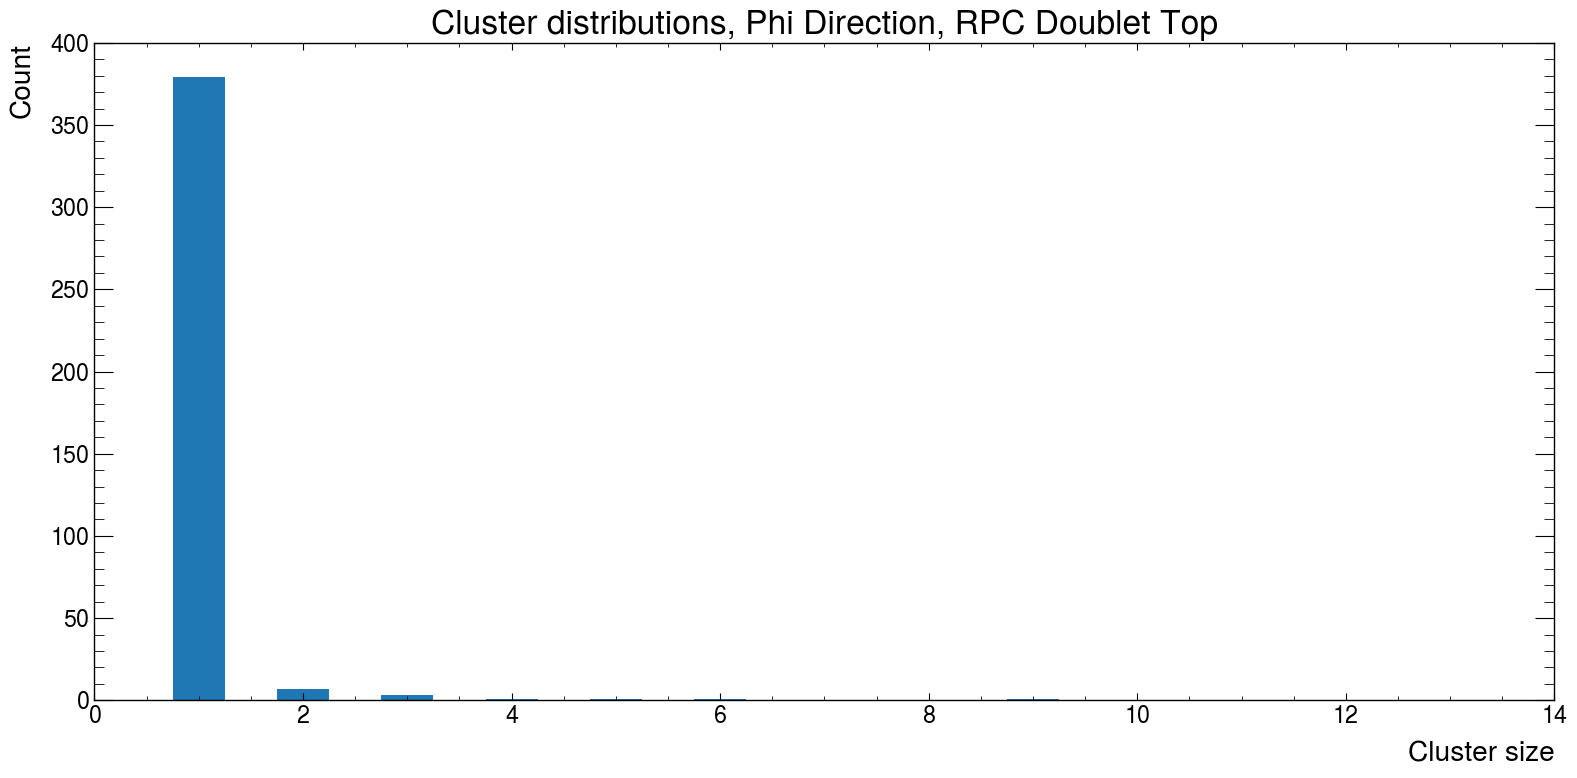

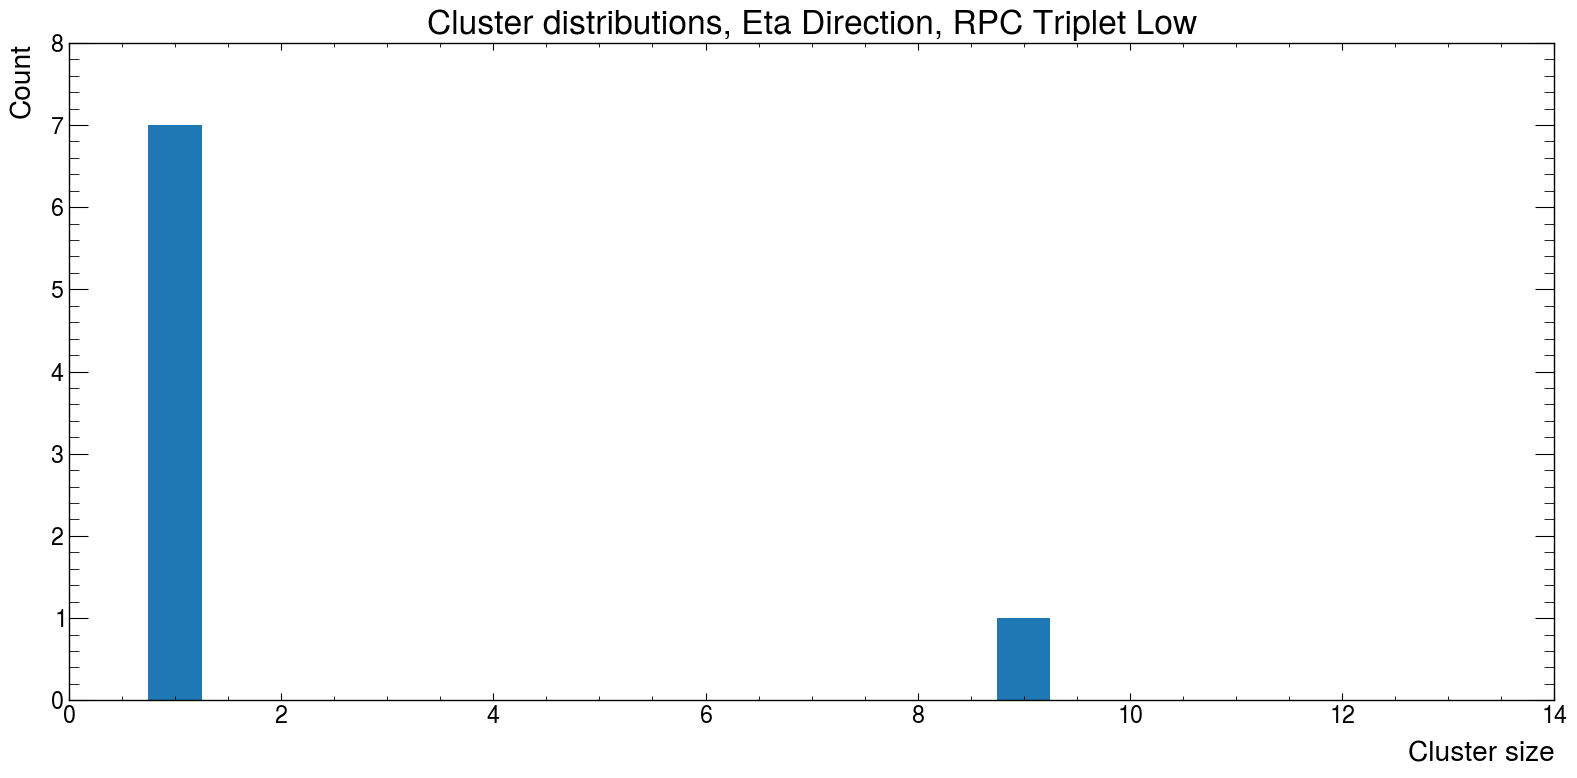

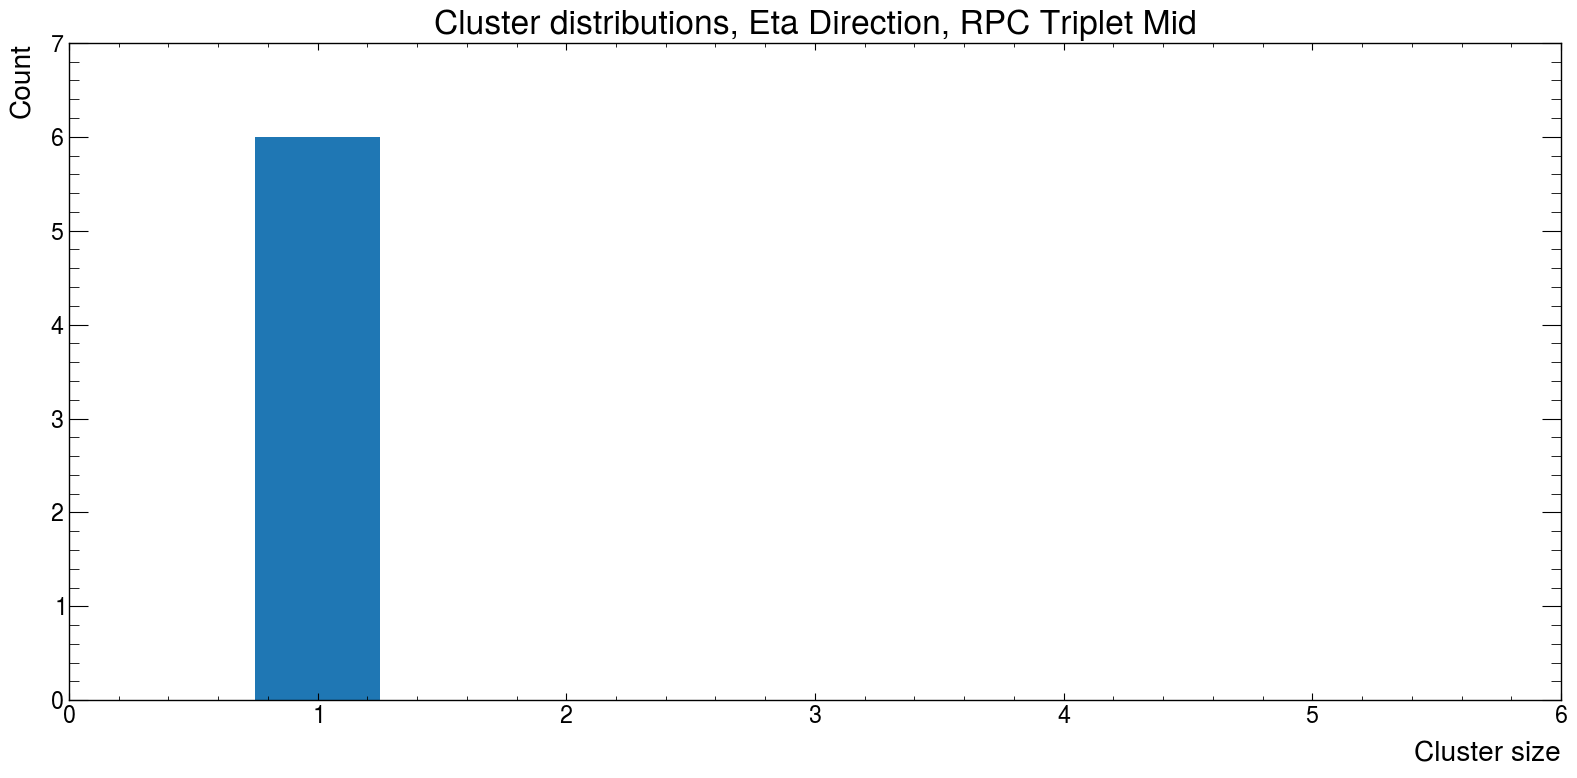

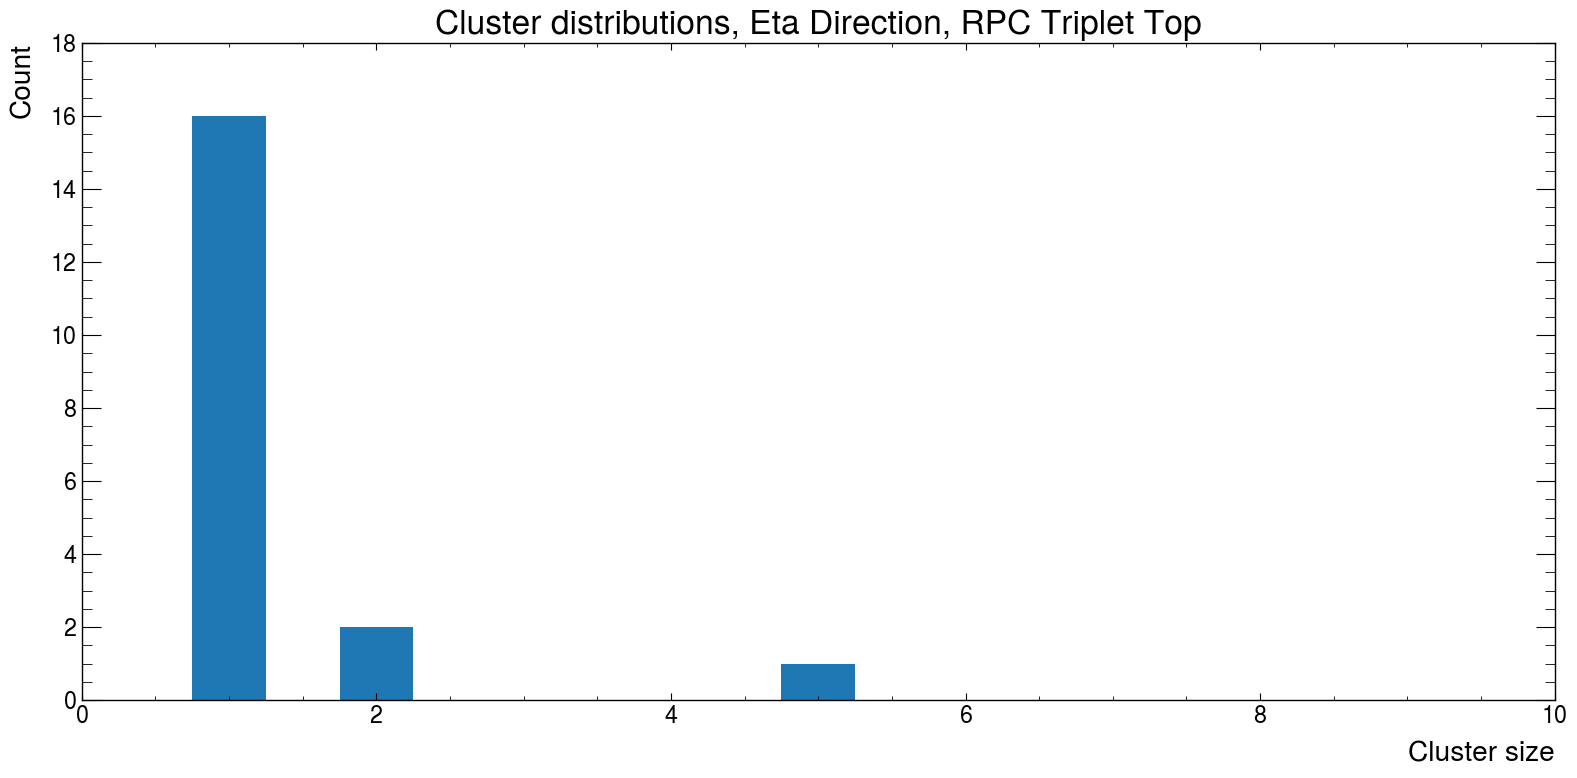

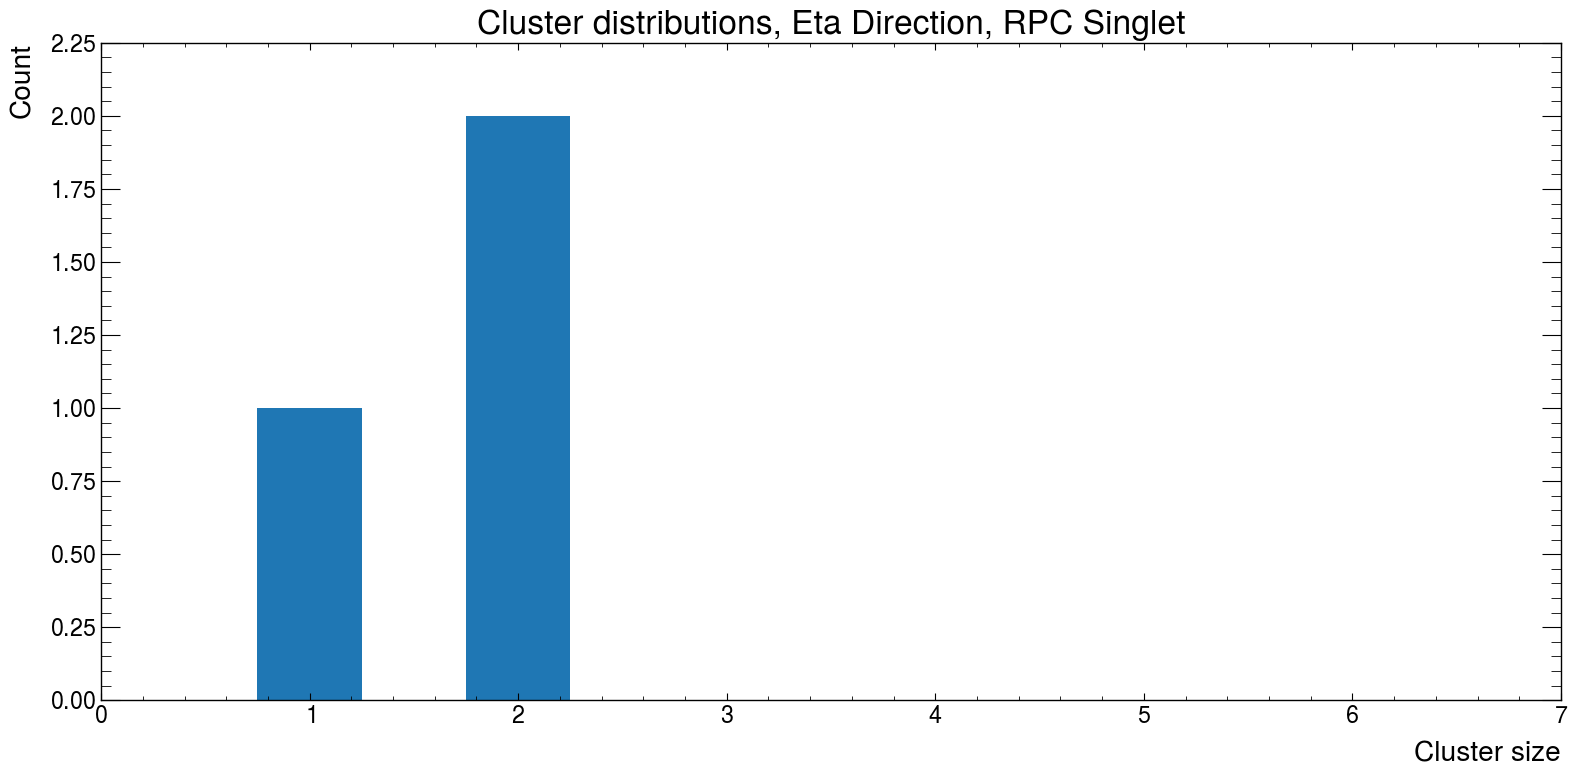

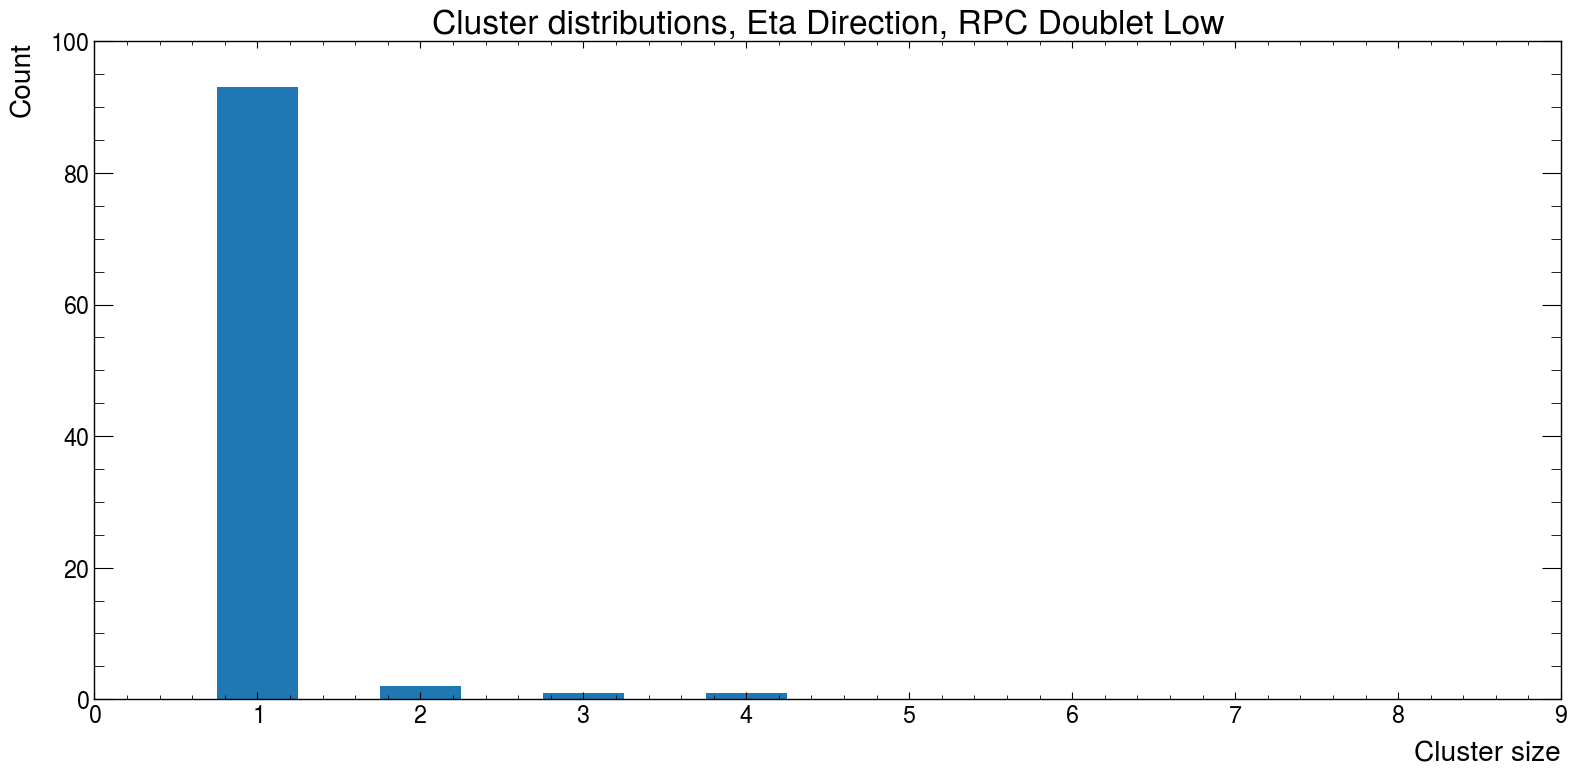

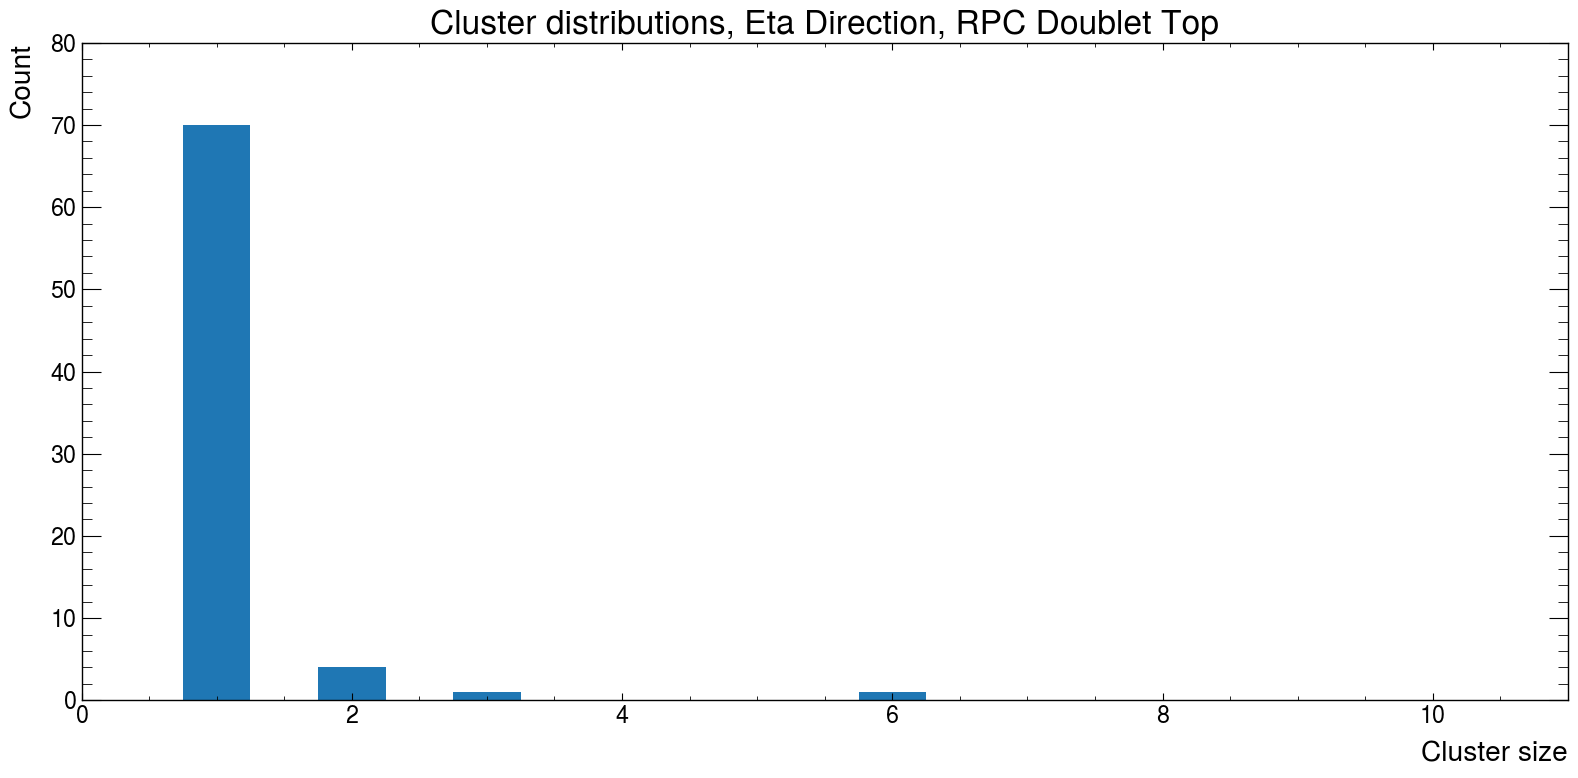

In [31]:
Test_out = dark_clustering(dark_coincidence)
plot_dark_clustering(Test_out[2],Test_out[3])